# Configuration

In [1]:
!/emr/notebook-env/bin/pip3 install --upgrade -i https://mirrors.ustc.edu.cn/pypi/web/simple numpy
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple matplotlib
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple joblib
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple pyspark=='3.1.1'
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple sklearn
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple scikit-learn
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple lightgbm
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple PyArrow
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple scikit-plot
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple cython
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple pandas
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple findspark

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Defaul

In [2]:
import findspark
findspark.init() 

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import sys, random, math, os, time, glob
from datetime import datetime, date, timedelta
import pytz
from dateutil.relativedelta import *
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import logging
from collections import namedtuple, deque
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 5000)
pd.options.display.float_format = '{:,.2f}'.format
# pd.set_option('display.width', 1000)

if 0:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.optim import Adam
    import torch.nn.functional as TF
    from torch.autograd import Variable
    from torch.distributions.categorical import Categorical
    torch.set_printoptions(precision=3)

np.set_printoptions(suppress=True, precision=5)
time_format = 'yyyy-MM-dd'
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import DateType, StructType, StructField, IntegerType
from pyspark.sql.window import Window
from pyspark.sql.functions import when, row_number, expr, concat, format_number, avg, isnan, weekofyear, rand
from pyspark.ml.feature import Bucketizer, VectorAssembler
from pyspark.ml.regression import LinearRegression as ml_LinearRegression 
from pyspark.sql import DataFrameStatFunctions as statFunc
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import collect_set, col, count
from pyspark.ml.fpm import FPGrowth

In [6]:
from sklearn.preprocessing import StandardScaler as sk_StandardScaler
from sklearn.decomposition import PCA as sk_pca
from sklearn.pipeline import Pipeline as sk_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.preprocessing import OneHotEncoder as sk_OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

from pyspark.ml import Pipeline as ml_pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler as ml_StandardScaler
from pyspark.ml.feature import PCA as ml_pca
from pyspark.ml.classification import LogisticRegression as ml_LogisticRegression

In [7]:
from lightgbm import LGBMClassifier
from sklearn.inspection import permutation_importance

In [8]:
from pyspark.sql import SparkSession
import os
os.environ["SPARK_CONF_DIR"] = "/usr/lib/spark/conf"
os.environ["HADOOP_CONF_DIR"] = "/etc/hadoop/conf"
os.environ["PYSPARK_PYTHON"] = "/usr/bin/python3"
os.environ["SPARK_HOME"] = "/usr/lib/spark"

#spark = SparkSession.builder.appName("test3").getOrCreate()\
#spark = SparkSession.builder.appName("local[*]").master("local[*]")\
spark = SparkSession.builder.master("yarn").appName("test")\
    .config("spark.executor.instances", "12")\
    .config("spark.executor.cores", "2")\
    .config("spark.executor.memory", "8g")\
    .config("spark.driver.memory", "100g")\
    .enableHiveSupport().getOrCreate()
#     .config("spark.jars.packages", "com.microsoft.ml.spark:mmlspark_2.11:1.0.0-rc1")\
#     .config("spark.jars.repositories", "https://mmlspark.azureedge.net/maven")\
#     # .config('spark.local.dir', 'SOME/DIR/WHERE/YOU/HAVE/SPACE')
    # .config("spark.sql.parquet.writeLegacyFormat", true)\
    #spark = SparkSession.builder.appName("test1")\

spark.conf.set("spark.sql.legacy.allowCreatingManagedTableUsingNhonemptyLocation", "true")
spark.conf.set("hive.exec.dynamic.partition", "true");
spark.conf.set("hive.exec.dynamic.partition.mode", "nonstrict");

In [9]:
sc=spark.conf
spark
spark.sparkContext._conf.get('spark.driver.memory')
spark.sparkContext._conf.get('spark.executor.memory')
spark.sparkContext._conf.get('spark.num.executors')
spark.sparkContext._conf.get('spark.executor.cores')

'100g'

'8g'

'2'

In [10]:
spark.sql('msck repair table dwd.dwd_sales_order_main_flow')
spark.sql('msck repair table dwd.dwd_sales_order_detail_flow')
spark.sql('msck repair table dwd.dwd_sales_order_return_main')
spark.sql('msck repair table dwd.dwd_sales_order_return_detail')
spark.sql('msck repair table dim.dim_agreement_coupon_info')
spark.sql('msck repair table dwd.dwd_agreement_coupon_ver')
spark.sql('msck repair table dim.dim_party_user_all')
spark.sql('msck repair table dim.dim_party_shop')
spark.sql('msck repair table dim.dim_item_sku')
spark.sql('msck repair table dim.dim_party_number_kid')
spark.sql('msck repair table dim.dim_public_date_calendar')
spark.sql('msck repair table dim.dim_public_location_area')

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

In [11]:
spark.sql('show databases').show()
spark.sql('show tables in dwd').show()
spark.sql('show tables in dim').show()

+---------+
|namespace|
+---------+
|  default|
|      dim|
|      dwd|
+---------+

+--------+--------------------+-----------+
|database|           tableName|isTemporary|
+--------+--------------------+-----------+
|     dwd|dwd_agreement_cou...|      false|
|     dwd|           dwd_event|      false|
|     dwd|dwd_sales_order_d...|      false|
|     dwd|dwd_sales_order_m...|      false|
|     dwd|dwd_sales_order_r...|      false|
|     dwd|dwd_sales_order_r...|      false|
+--------+--------------------+-----------+

+--------+--------------------+-----------+
|database|           tableName|isTemporary|
+--------+--------------------+-----------+
|     dim|dim_agreement_cou...|      false|
|     dim|        dim_item_sku|      false|
|     dim|dim_party_number_kid|      false|
|     dim|      dim_party_shop|      false|
|     dim|  dim_party_user_all|      false|
|     dim|dim_public_date_c...|      false|
|     dim|dim_public_locati...|      false|
+--------+--------------------+---

In [12]:
start = time.time()
print(start)

1642056127.4772944


In [13]:
mdl_label='legomodel_event'
qc_flag = 1

# Date Mapping

In [14]:
# today is the first day in the prediction data
# td is the last day in the model fitting data
current_date_str = datetime.fromtimestamp(int(time.time()), pytz.timezone('Asia/Shanghai')).date()
today= current_date_str
td = today-timedelta(days=1)
td
td_offset=today
td_offset

offset_day=6-td_offset.weekday()
offset_day
#offset day是用来计算跨年时候的weekofyear使用的

datetime.date(2022, 1, 12)

datetime.date(2022, 1, 13)

3

In [15]:
#当month为12，weekofyear为1的时候，将weekofyear改为下一年的第一周
#当month为1，weekofyear大于等于52的时候，将weekofyear改为上一年的最后一周
#其他的情况，将weekofyear设为年份*100+月份（比如2020年1月1日为2020*100+1 = 202001）
def year_wk(df, date_col, day_to_add, new_date_col, wk_col, offset_day=offset_day, drop_new_col=False):
    df_new=df.withColumn(new_date_col, F.date_add(F.col(date_col), day_to_add+offset_day))\
                .withColumn(wk_col, when( (F.month(new_date_col)==12) & (F.weekofyear(new_date_col)==1), (F.year(new_date_col)+F.lit(1))*100 + F.weekofyear(new_date_col))\
                    .when( (F.month(new_date_col)==1) & (F.weekofyear(new_date_col)>=52), (F.year(new_date_col)-F.lit(1))*100 + F.weekofyear(new_date_col))\
                    .otherwise(F.year(new_date_col)*100 + F.weekofyear(new_date_col)))
    if(drop_new_col):
        df_new=df_new.drop(new_date_col)
    return df_new

In [16]:
td_ny = td+relativedelta(years=+1)

td_ly = td+relativedelta(years=-10)
# this will give you a list containing all of the dates
days_post = [td + timedelta(days=x) for x in range((td_ny-td).days)]

days_pre = [td - timedelta(days=x) for x in range((td-td_ly).days + 1, 0, -1)]
#weeks: 7 days
weeks_post = [0 + math.floor(x/7) for x in range((td_ny-td).days)]
weeks_pre = [0 - math.ceil(x/7) for x in range((td-td_ly).days + 1, 0, -1)]
days=days_pre+days_post
weeks=weeks_pre+weeks_post
# quarters: 91 days
quarters_post = [0 + math.floor(x/91) for x in range((td_ny-td).days)]
quarters_pre = [0 - math.ceil(x/91) for x in range((td-td_ly).days + 1, 0, -1)]
quarters=quarters_pre+quarters_post
quarter_last_day= [td+timedelta(days=q*91+90) for q in quarters]

schema = StructType([
    StructField('date', DateType(), True),
    StructField('week', IntegerType(), True),
    StructField('quarter', IntegerType(), True),
    StructField('quarter_last_day', DateType(), True),
])
df_days=spark.createDataFrame(zip(days, weeks, quarters, quarter_last_day), schema)\
            .withColumn('recency', F.datediff(F.col('quarter_last_day'), F.col('date')))
df_days=year_wk(df_days, date_col='date', day_to_add=0, new_date_col='date_proxy', wk_col='weekofyear', drop_new_col=False)
df_days.show()

+----------+----+-------+----------------+-------+----------+----------+
|      date|week|quarter|quarter_last_day|recency|date_proxy|weekofyear|
+----------+----+-------+----------------+-------+----------+----------+
|2012-01-11|-522|    -41|      2012-01-24|     13|2012-01-14|    201202|
|2012-01-12|-522|    -41|      2012-01-24|     12|2012-01-15|    201202|
|2012-01-13|-522|    -41|      2012-01-24|     11|2012-01-16|    201203|
|2012-01-14|-522|    -41|      2012-01-24|     10|2012-01-17|    201203|
|2012-01-15|-522|    -41|      2012-01-24|      9|2012-01-18|    201203|
|2012-01-16|-522|    -41|      2012-01-24|      8|2012-01-19|    201203|
|2012-01-17|-522|    -41|      2012-01-24|      7|2012-01-20|    201203|
|2012-01-18|-521|    -41|      2012-01-24|      6|2012-01-21|    201203|
|2012-01-19|-521|    -41|      2012-01-24|      5|2012-01-22|    201203|
|2012-01-20|-521|    -41|      2012-01-24|      4|2012-01-23|    201204|
|2012-01-21|-521|    -41|      2012-01-24|      3|2

In [17]:
df_days.filter(F.col('date')==td).toPandas()

,date,week,quarter,quarter_last_day,recency,date_proxy,weekofyear
0,2022-01-12,0,0,2022-04-12,90,2022-01-15,202202


In [18]:
#df_days.write.option('path','hdfs://172.20.37.218:8020/user/hive/warehouse/default').mode('overwrite').saveAsTable('default.df_days')
#df_days.write.mode('overwrite').saveAsTable('default.df_days')

# Load Data

In [19]:
#order
oo_mem_1=spark.sql("select main_order_code as order_no, to_date(pay_time, 'yyyyMMdd') as statistic_date, item_five_lego_code as prod_code,\
            mobile as member_no, source_type, order_state, \
            lego_shop_code as shop_code, source_channel as shop_name, \
            receipts_amount as m18, receivable_amount as price, is_gwp, \
            sales_num as m22 from dwd.dwd_sales_order_detail_flow \
            where order_state='已完成' or order_state = 'Y'")\
        .withColumn('date', F.to_date("statistic_date", 'yyyy-MM-dd'))\
        .join(df_days, on=['date'], how='left')\
        .repartition(1024, 'member_no')
from pyspark.sql.types import StringType
oo_mem_1 = oo_mem_1.filter((F.col('is_gwp') == '否')&(F.col('m18') != '0')&(F.col('statistic_date')<td)&(F.col('prod_code')!='兑礼')).withColumn('week', oo_mem_1['week'].cast(StringType()))\
               .withColumn('quarter', oo_mem_1['quarter'].cast(StringType()))\
               .withColumn('recency', oo_mem_1['recency'].cast(StringType()))\
               .withColumn('weekofyear', oo_mem_1['weekofyear'].cast(StringType()))\
               .filter(F.col('statistic_date').isNotNull())
#                .filter((F.col('prod_code')!='None') & (F.col('prod_code')!='' ))
oo_mem_1.count()

4144605

In [20]:
#return
refund = spark.sql("select main_order_code as order_no,return_order_state,return_amount as m18 \
                    from dwd.dwd_sales_order_return_main where main_order_code != 'None' and return_order_state != 'None'")
refund = refund.drop_duplicates(subset=['order_no'])
oo_mem_2 = oo_mem_1.join(refund, on=['order_no','m18'], how='left')\
                .withColumn('return_flag', when(F.col('return_order_state')!='None',1).otherwise(0))\
                .drop('return_order_state')\
                .filter(F.col('return_flag') ==0)
oo_mem_2.count()

4125753

In [21]:
#prod
prod_pre = spark.sql('select lego_sku_id as prod_code, year_version, age_mark, product_bu, \
                topic, topic_name, topic_group, super_segment, item_cn_line, prod_category from dim.dim_item_sku')
prod_pre=prod_pre.drop_duplicates(subset=['prod_code'])
prod = prod_pre.select([when(col(c)=="",None).otherwise(col(c)).alias(c) for c in prod_pre.columns])
prod.count()

5541

In [22]:
prod.limit(5).toPandas()

,prod_code,year_version,age_mark,product_bu,topic,topic_name,topic_group,super_segment,item_cn_line,prod_category
0,10251,2018,16+,LEGO Creator,Creator Expert,None,Expert Modular Buildings,None,ICONS,D2C driven
1,10263,2020,12+,LEGO Creator,Creator Expert,None,Expert Seasonals,Boys,ICONS,D2C driven
2,10267,2020,12+,LEGO Creator,Creator Expert,None,Expert Seasonals,Boys,ICONS,D2C driven
3,10758,2019,None,4+,4+,None,4+ Jurassic World,Preschool,JUNIORS,Standard Retail
4,10808,2017,2-5,DUPLO,DUPLO Town,None,DUPLO Town,None,DUPLO,Standard Retail


In [23]:
#member
mem_pre=spark.sql('select register_phone_no as member_no, is_member, is_shopper, is_consumber as is_consumer,\
        gender, age_cohorts, marital_status, city_grade, educational_status, user_job, monthly_pay,\
        is_inside_staff, chinese_zodiac, constellation, crm_member_register_date as date_join, \
        crm_member_register_age_month from dim.dim_party_user_all')
mem_pre = mem_pre.drop_duplicates(subset=['member_no'])
mem = mem_pre.select([when(col(c)=="",None).otherwise(col(c)).alias(c) for c in mem_pre.columns])
mem.count()

7625118

In [24]:
#holiday
holiday = spark.sql("select date_name as statistic_date, to_date(lunar_date_name,'yyyy-MM-dd') as lunar_date from dim.dim_public_date_calendar")
oo_mem_3 = oo_mem_2.join(holiday, on='statistic_date',how='left')
oo_mem_4 = oo_mem_3.withColumn('date', F.date_format(F.col('date'), 'yyyyMMdd'))\
                   .withColumn('lunar_date', F.date_format(F.col('lunar_date'), 'yyyyMMdd'))
oo_mem = oo_mem_4.withColumn('holiday',when((F.col('date').substr(5,4) >= '1218')&(F.col('date').substr(5,4) <= '1227'),F.lit('圣诞节'))\
                                .when((F.col('date').substr(5,4) >= '0525')&(F.col('date').substr(5,4) <= '0603'),F.lit('儿童节'))\
                                .when((F.col('date').substr(5,4) >= '0611')&(F.col('date').substr(5,4) <= '0620'),F.lit('六一八'))\
                                .when((F.col('date').substr(5,4) >= '1104')&(F.col('date').substr(5,4) <= '1113'),F.lit('双十一'))\
                                .when((F.col('date').substr(5,4) >= '1205')&(F.col('date').substr(5,4) <= '1214'),F.lit('双十二'))\
                                .when((F.col('lunar_date').substr(5,4) >= '1224')&(F.col('lunar_date').substr(5,4) <= '1230'),F.lit('春节'))\
                                .when((F.col('lunar_date').substr(5,4) >= '0101')&(F.col('lunar_date').substr(5,4) <= '0103'),F.lit('春节'))\
                                .otherwise(F.lit(0)))\

In [25]:
oo_mem.count()

4125767

## Load event data

In [26]:
#event
event = spark.sql("select user as member_no, eventdate as date, event_key as event, freq from dwd.dwd_event")
event.count()
event.limit(10).toPandas()

16000932

,member_no,date,event,freq
0,5199jWynU8GVfXXVIexA4Q==,2021-10-31,pageView,1
1,oIRrl0RZXA5Pw_1EcLctvFYF-kS8,2021-08-20,enterMini,1
2,oIRrl0Xx25-sfbj6k86mO0C-caao,2021-10-31,$visit,1
3,+EYrOkxnVSkrl32jJffuyQ==,2021-11-10,campaignStoreCheck,1
4,oIRrl0WW8U19UB345xHdSn2axAno,2021-08-21,enterMini,1
5,7sj1Oz7jSNywlf3FtSuJMA==,2021-09-17,$exit,1
6,oIRrl0fhVqA5bh5GqAvEXyijOGN8,2021-08-30,pageView,3
7,oIRrl0XJitQcGJf67K5u5pevMkbE,2021-08-21,$page,1
8,oIRrl0U_LXIbHUn6p_1vVa6-FkKw,2021-08-22,$exit,1
9,oIRrl0Q3QoatXxhZsxpEZsZxoC58,2021-08-20,productPageView,23


In [122]:
spark.sql("select * from dwd.dwd_event").show()

Py4JJavaError: An error occurred while calling o3225.showString.
: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:748)

The currently active SparkContext was created at:

(No active SparkContext.)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:119)
	at org.apache.spark.SparkContext.broadcast(SparkContext.scala:1542)
	at org.apache.spark.sql.execution.datasources.orc.OrcFileFormat.buildReaderWithPartitionValues(OrcFileFormat.scala:165)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD$lzycompute(DataSourceScanExec.scala:458)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD(DataSourceScanExec.scala:408)
	at org.apache.spark.sql.execution.FileSourceScanExec.doExecuteColumnar(DataSourceScanExec.scala:600)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeColumnar$1(SparkPlan.scala:212)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:223)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:220)
	at org.apache.spark.sql.execution.SparkPlan.executeColumnar(SparkPlan.scala:208)
	at org.apache.spark.sql.execution.InputAdapter.doExecuteColumnar(WholeStageCodegenExec.scala:519)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeColumnar$1(SparkPlan.scala:212)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:223)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:220)
	at org.apache.spark.sql.execution.SparkPlan.executeColumnar(SparkPlan.scala:208)
	at org.apache.spark.sql.execution.ColumnarToRowExec.inputRDDs(Columnar.scala:202)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:746)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:185)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:223)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:220)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:181)
	at org.apache.spark.sql.execution.SparkPlan.getByteArrayRdd(SparkPlan.scala:326)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:444)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:430)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:47)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3733)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2762)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3724)
	at org.apache.spark.sql.catalyst.QueryPlanningTracker$.withTracker(QueryPlanningTracker.scala:107)
	at org.apache.spark.sql.execution.SQLExecution$.withTracker(SQLExecution.scala:232)
	at org.apache.spark.sql.execution.SQLExecution$.executeQuery$1(SQLExecution.scala:110)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:135)
	at org.apache.spark.sql.catalyst.QueryPlanningTracker$.withTracker(QueryPlanningTracker.scala:107)
	at org.apache.spark.sql.execution.SQLExecution$.withTracker(SQLExecution.scala:232)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:135)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:253)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:134)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:772)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:68)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3722)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2762)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2969)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:302)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:339)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [27]:
event.agg(F.countDistinct('member_no').alias('member_num_unique'), \
          F.max('date').alias('max_date'), \
          F.min('date').alias('min_date'), \
          F.count('member_no').alias('member_no_num'), \
            F.countDistinct('event').alias('event_num')).toPandas()

,member_num_unique,max_date,min_date,member_no_num,event_num
0,1700720,2021-11-30,2002-01-05,16000932,99


In [28]:
event.filter(F.col('date')>='2021-01-01').agg(F.count('member_no')).toPandas()
event.filter(F.col('date')<'2021-01-01').agg(F.count('member_no')).toPandas()

,count(member_no)
0,16000931


,count(member_no)
0,1


In [29]:
event.orderBy(F.asc('date')).limit(5).toPandas()

,member_no,date,event,freq
0,CML2LCheJkwHzSTDzvSflA==,2002-01-05,$page,6
1,oIRrl0SzwcoCfiaZYWRIW10kuMT8,2021-08-04,$page,1
2,oIRrl0WP61CQ3BnE4kkNRFlETGUE,2021-08-16,$page,1
3,oIRrl0RtQ1W8FOFp8rKPMyIpnVUU,2021-08-19,$page,1
4,oIRrl0UGtDJNXwHAntccZlCPMV_s,2021-08-19,$visit,5


In [30]:
w = Window().orderBy(F.desc('cust_count'))
df_behavior_summary=event.fillna(0).groupby('event').agg(F.countDistinct('member_no').alias('cust_count'))\
                        .orderBy(F.desc('cust_count'))
pd_behavior_summary=df_behavior_summary.toPandas()
pd_behavior_summary

,event,cust_count
0,$page,1639227
1,$visit,1459057
2,pageView,1451537
3,enterMini,1392805
4,$exit,1371752
5,$bounce,766542
6,pageClick,545876
7,mobileAuthorizeRecord,430356
8,mobileAuthorizeConfirm,380654
9,privacyTermRecord,315582


In [31]:
#过滤掉一条异常数据
#behavior = event.filter(F.col('date')>='2021-01-01').filter(F.col('event').isin(['$page','$visit','pageView',\
#                                                 'enterMini','$exit','$bounce','pageClick','mobileAuthorizeRecord',\
#                                                 'mobileAuthorizeConfirm','privacyTermRecord','privacyTermConfirm','pageSetView',\
#                                                 'registerSuccess','positionAuthorizeConfirm','positionAuthorize',\
#                                                 'productPageView','memberInfoAdd',\
#                                                 'campaign_PageView','couponReceive','campaignPageView',\
#                                                 '$view_click','campaignPageClick','signInSuccess',\
#                                                 'productReserveView','campaignStore','TM_enterMini','TM_pageView',\
#                                                 'campaignTableView','campaignStoreCheck','$view_change','productStore',\
#                                                 'storeSignInFail','TM_pageClick','campaignMobile','campaignJoin',\
#                                                 'campaignStoreSelect','storeFavorite','productContactAdd','shareMini','campaignEventSelect'])).repartition(512, 'member_no')
#behavior[['event']].drop_duplicates().toPandas()

In [32]:
#过滤掉一条异常数据
behavior = event.filter(F.col('date')>='2021-01-01').filter(F.col('event').isin(['pageView',\
                                                 'enterMini',\
                                                 'mobileAuthorizeConfirm','privacyTermConfirm',\
                                                 'registerSuccess','positionAuthorize',\
                                                 'productPageView','couponReceive','campaignPageView','campaignPageClick',\
                                                 'campaignTableView','campaignJoin','shareMini','campaignEventSelect'])).repartition(512, 'member_no')
behavior[['event']].drop_duplicates().toPandas()

,event
0,registerSuccess
1,shareMini
2,productPageView
3,campaignPageView
4,campaignPageClick
5,couponReceive
6,positionAuthorize
7,privacyTermConfirm
8,mobileAuthorizeConfirm
9,campaignJoin


In [33]:
behavior = behavior.join(df_days, on=['date'], how='left').repartition(512, 'member_no')
behavior.limit(5).toPandas()

,date,member_no,event,freq,week,quarter,quarter_last_day,recency,date_proxy,weekofyear
0,2021-11-13,oIRrl0ZeqQaZ6AcemjMqdgrBacJk,enterMini,1,-9,-1,2022-01-11,59,2021-11-16,202146
1,2021-08-24,oIRrl0Rh5iqvMLi4U_NvH2zITIyY,pageView,2,-21,-2,2021-10-12,49,2021-08-27,202134
2,2021-10-08,YgCM3d0IvAecrCuGxfTC/Q==,enterMini,1,-14,-2,2021-10-12,4,2021-10-11,202141
3,2021-08-20,oIRrl0QJs2LBLzcamJ8zEX-BJi7Q,productPageView,2,-21,-2,2021-10-12,53,2021-08-23,202134
4,2021-10-01,oIRrl0cRfhQruy9K7V3L7Qi_wipU,productPageView,1,-15,-2,2021-10-12,11,2021-10-04,202140


In [34]:
col_to_code = []
behavior_datediff = behavior.withColumn("behavior_datediff", F.datediff(F.col('date'), F.lag(F.col('date'), 1)\
    .over(Window.partitionBy("member_no")\
    .orderBy('date')))).fillna(0,subset=['behavior_datediff'])
behavior_datediff_new_3 = behavior_datediff.groupBy(['member_no','quarter']+col_to_code).agg(F.min('behavior_datediff').alias('min_behavior_diff'),\
                            F.max('behavior_datediff').alias('max_behavior_diff'),\
                            F.mean('behavior_datediff').alias('avg_behavior_diff'),\
                            F.stddev('behavior_datediff').alias('stddev_behavior_diff')).fillna(0).repartition(256, 'member_no')

In [35]:
behavior_datediff_new_3.limit(20).toPandas()

,member_no,quarter,min_behavior_diff,max_behavior_diff,avg_behavior_diff,stddev_behavior_diff
0,+6kY95INxAA2vVoIalOviQ==,-2,0,0,0.00,0.00
1,+DhXQl+zuXUIPrsSX7m6MQ==,-1,0,0,0.00,0.00
2,+FC4v+4ydRdiY/wzKTYtpg==,-1,0,35,7.00,15.65
3,+LrBlwjtkp6tPtNRxVfmew==,-2,0,0,0.00,0.00
4,+ME75HlZb2gUSSx6uK1xAQ==,-1,0,0,0.00,0.00
5,+O0WW8f69v6UKY2O7TG+DA==,-2,0,14,3.50,7.00
6,+T5c992ZzXExQIZjFMznjw==,-2,0,0,0.00,0.00
7,+VmfJE1U2zNfjqs+yDrY8w==,-2,0,0,0.00,0.00
8,+XPUL7hRLWwG8LDe7KoAHQ==,-2,0,0,0.00,0.00
9,+Yf7eD/6D2arJhR81wM2Eg==,-1,0,0,0.00,0.00


In [36]:
behavior_datediff_2 = behavior_datediff.groupBy(['member_no','quarter']+col_to_code).pivot('event').agg(F.countDistinct('date')).fillna(0).repartition(256, 'member_no')
behavior_datediff_2 = behavior_datediff_2.drop('null')
behavior_datediff_2 = behavior_datediff_2.select(['member_no', 'quarter']+[F.col(col).alias(col+'_num_date') for col in behavior_datediff_2.columns if col not in ['member_no', 'quarter']])


In [37]:
behavior_datediff_2.limit(20).toPandas()

,member_no,quarter,campaignEventSelect_num_date,campaignJoin_num_date,campaignPageClick_num_date,campaignPageView_num_date,campaignTableView_num_date,couponReceive_num_date,enterMini_num_date,mobileAuthorizeConfirm_num_date,pageView_num_date,positionAuthorize_num_date,privacyTermConfirm_num_date,productPageView_num_date,registerSuccess_num_date,shareMini_num_date
0,oIRrl0ZeqQaZ6AcemjMqdgrBacJk,-1,0,0,0,0,0,1,1,1,1,0,1,0,1,0
1,oIRrl0Rh5iqvMLi4U_NvH2zITIyY,-2,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,YgCM3d0IvAecrCuGxfTC/Q==,-2,0,0,0,2,1,0,48,14,49,0,0,2,0,0
3,oIRrl0QJs2LBLzcamJ8zEX-BJi7Q,-2,0,0,0,0,0,0,4,0,4,1,0,3,0,0
4,oIRrl0cRfhQruy9K7V3L7Qi_wipU,-2,0,0,0,1,0,0,1,0,1,1,0,1,0,0
5,oIRrl0TC99Jl0ZoFmYCeXm5eitWM,-2,0,0,0,0,0,0,1,0,1,0,0,1,0,0
6,oIRrl0QPmP9m9lu-XOG3MHgxHA6w,-1,0,0,0,0,0,1,2,1,2,0,1,0,1,0
7,oIRrl0TborU1lWODsAWT-iVonB-Q,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,oIRrl0ScAENmj4wvfDDvDNORELY8,-2,0,0,0,0,0,0,1,0,1,0,0,0,0,0
9,oIRrl0flOvHjYESn9PeGklJHmtTU,-1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [38]:
behavior_datediff_1 = behavior_datediff.groupBy(['member_no','quarter']+col_to_code).pivot('event').agg(F.count('date')).fillna(0)
behavior_datediff_1 = behavior_datediff_1.drop('null')
behavior_datediff_1 = behavior_datediff_1.select(['member_no','quarter']+[F.col(col).alias(col+'_num_times') for col in behavior_datediff_1.columns if col not in ['member_no','quarter']])

In [39]:
behavior_datediff_1.limit(20).toPandas()

,member_no,quarter,campaignEventSelect_num_times,campaignJoin_num_times,campaignPageClick_num_times,campaignPageView_num_times,campaignTableView_num_times,couponReceive_num_times,enterMini_num_times,mobileAuthorizeConfirm_num_times,pageView_num_times,positionAuthorize_num_times,privacyTermConfirm_num_times,productPageView_num_times,registerSuccess_num_times,shareMini_num_times
0,oIRrl0QoOTGhAFkBdVrVwxN-R6yQ,-1,0,0,0,0,0,0,2,0,2,0,0,0,0,0
1,oIRrl0dB4H1OIjSrTopSZJDAB9h0,-2,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,vydkZOpeU0NJY2KJUAHSyA==,-2,0,0,0,1,0,0,12,4,12,0,0,2,0,4
3,oIRrl0QIPPWTrgBWvrYkoDgXTH10,-1,0,0,0,0,0,0,2,1,2,0,1,0,0,0
4,OPKAH2JQZM6SarijtPteLA==,-1,0,0,0,0,0,1,1,0,1,0,0,0,0,0
5,oIRrl0ckxNYySs3eS7HTc8giMkOM,-2,0,0,0,1,0,0,1,1,1,0,1,0,0,0
6,mGgRgJDOxDXh8HqtYG+yqg==,-2,1,1,1,1,1,0,1,1,2,1,0,0,0,0
7,oIRrl0eVLESb6ZvpwPl91NH25_iw,-2,0,0,0,0,0,0,1,1,1,0,1,0,0,0
8,oIRrl0a_PwoEPePrdoN-eXomHUeg,-2,0,0,0,0,0,0,1,0,1,0,0,0,0,0
9,oIRrl0f4zMvcHmUF4N88Cpx11gLU,-1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [40]:
behavior_datediff_1.count()
behavior_datediff_2.count()
behavior_datediff_new_3.count()

1646432

1646432

1646432

In [41]:
behavior_datediff = behavior_datediff_new_3.join(behavior_datediff_1, how = 'full', on = ['member_no','quarter'])\
                                            .join(behavior_datediff_2, how = 'full', on = ['member_no','quarter']).repartition(512, 'member_no')
behavior_datediff.count()

1646432

In [42]:
behavior_datediff.write.mode('overwrite').saveAsTable('default.mlmdl_behavior_' + mdl_label)

In [43]:
oo_mem.write.mode('overwrite').saveAsTable('default.mlmdl_oo_mem_' + mdl_label)

### 读取oo_mem和behavior表的数据

In [44]:
oo_mem = spark.sql('select * from default.mlmdl_oo_mem_' +mdl_label).repartition(1024, 'member_no')
behavior_datediff = spark.sql('select * from default.mlmdl_behavior_' +mdl_label).repartition(1024, 'member_no')

# Data Mining and Preparation

In [45]:
if (qc_flag):
    print('oo_mem_1情况如下')
    oo_mem_1.limit(10).toPandas()
    oo_mem_1.count()
    print('prod情况如下')
    prod.limit(10).toPandas()
    prod.agg(F.count('prod_code').alias('num_row'), F.countDistinct('prod_code').alias('num_prod')).toPandas()
    print('mem情况如下')
    mem.limit(10).toPandas()
    mem.agg(F.count('member_no').alias('num_row'), F.countDistinct('member_no').alias('num_member')).toPandas()
    print('holiday情况如下')
    holiday.limit(5).toPandas()
    print('oo_mem情况如下')
    oo_mem.count()
    oo_mem.rdd.getNumPartitions()
    oo_mem.agg(F.count('member_no').alias('num_row'),\
       F.sum('m18').alias('m18'),\
       F.sum('m22').alias('m22'),\
       F.countDistinct('order_no').alias('num_txn'),\
       F.countDistinct('member_no').alias('num_member'),\
       F.countDistinct('prod_code').alias('num_sku')).toPandas()  

oo_mem_1情况如下


,date,order_no,statistic_date,prod_code,member_no,source_type,order_state,shop_code,shop_name,m18,price,is_gwp,m22,week,quarter,quarter_last_day,recency,date_proxy,weekofyear
0,2020-01-07,143006,2020-01-07,60214,jKTC8saFVP+1FYQa8oC9LQ==,移动端订单,Y,JDPOP,JD,319.00,299.00,否,1.00,-106,-9,2020-01-14,7,2020-01-10,202002
1,2019-07-17,534132098908881221,2019-07-17,75890,wjuTrephauriEylMBwEW4Q==,,Y,TMALL,TMALL,175.00,169.00,否,1.00,-130,-10,2019-10-15,90,2019-07-20,201929
2,2019-09-10,617095395384863517,2019-09-10,42099,oEdl7JijoNZHo60OEqOF2A==,,Y,TMALL,TMALL,"1,999.00","1,999.00",否,1.00,-123,-10,2019-10-15,35,2019-09-13,201937
3,2022-01-03,122010402414108,2022-01-03,43197,5gFhSXGtobYa0M+58wxCrw==,"手机,手机",Y,TMALL,TMALL,"1,899.00","1,899.00",否,1.00,-2,-1,2022-01-11,8,2022-01-06,202201
4,2019-11-05,696408258767516425,2019-11-05,43172,uQkqjttzkwNzAkfUosBI2A==,,Y,TMALL,TMALL,799.00,799.00,否,1.00,-115,-9,2020-01-14,70,2019-11-08,201945
5,2021-01-30,2101304286997,2021-01-30,43172,ow8DW5tYu5Cwk71NmlzTTg==,"手机,手机",Y,TMALL,TMALL,799.00,799.00,否,1.00,-50,-4,2021-04-13,73,2021-02-02,202105
6,2021-02-11,0016005121021100036,2021-02-11,852766,Se1I1uGuBhQF2hxk0eggKw==,LCS,Y,LCS245-LW,LCS,79.00,79.00,否,1.00,-48,-4,2021-04-13,61,2021-02-14,202106
7,2020-02-10,842674339860261787,2020-02-10,21317,GaLlk6/Brm2t6HAUT3Z1xw==,,Y,TMALL,TMALL,899.00,899.00,否,1.00,-101,-8,2020-04-14,64,2020-02-13,202007
8,2018-12-16,262642,2018-12-16,10847,/Lp9OwkWGiEpmVCwy555bQ==,移动端订单,Y,JDPOP,JD,197.00,229.00,否,1.00,-161,-13,2019-01-15,30,2018-12-19,201851
9,2020-07-11,1114739329028956154,2020-07-11,70676,mnbHvsa3dJlcUa9S0H2lcA==,,Y,TMALL,TMALL,699.00,799.00,否,1.00,-79,-7,2020-07-14,3,2020-07-14,202029


4144605

prod情况如下


,prod_code,year_version,age_mark,product_bu,topic,topic_name,topic_group,super_segment,item_cn_line,prod_category
0,10251,2018,16+,LEGO Creator,Creator Expert,None,Expert Modular Buildings,None,ICONS,D2C driven
1,10263,2020,12+,LEGO Creator,Creator Expert,None,Expert Seasonals,Boys,ICONS,D2C driven
2,10267,2020,12+,LEGO Creator,Creator Expert,None,Expert Seasonals,Boys,ICONS,D2C driven
3,10758,2019,None,4+,4+,None,4+ Jurassic World,Preschool,JUNIORS,Standard Retail
4,10808,2017,2-5,DUPLO,DUPLO Town,None,DUPLO Town,None,DUPLO,Standard Retail
5,10841,2018,2-5,DUPLO,DUPLO Town,None,DUPLO Land,None,DUPLO,Standard Retail
6,10853,2017,1½-5,DUPLO,DUPLO My First,None,DUPLO My First,None,DUPLO,Standard Retail
7,10872,2020,2-5,DUPLO,DUPLO Town,None,DUPLO Trains,Preschool,DUPLO,Standard Retail
8,10906,2019,2+,DUPLO,DUPLO Town,None,DUPLO Wild Animals,Preschool,DUPLO,Standard Retail
9,10918,2020,1½+,DUPLO,DUPLO My First,None,DUPLO My First,Preschool,DUPLO,Standard Retail


,num_row,num_prod
0,5540,5540


mem情况如下


,member_no,is_member,is_shopper,is_consumer,gender,age_cohorts,marital_status,city_grade,educational_status,user_job,monthly_pay,is_inside_staff,chinese_zodiac,constellation,date_join,crm_member_register_age_month
0,++76/2UsuOjUPcaPoPPkewscdmUIbc39dIhhV1ecZLCY3QrrF3fo9rUXGk/jRoAN,1,1,0,男,26,Unknown,None,Unknown,Unkown,NaN,None,猪,天秤座,2021-05-27,8.00
1,++8aOcQkFMLQZuVQ2FQCRQ==,1,0,0,None,0,Unknown,None,Unknown,Unkown,NaN,None,None,None,2018-05-19,44.00
2,++A8tyh9guU+2jEkK1wzgw==,1,1,1,女,0,None,None,None,None,NaN,None,None,None,None,NaN
3,++ADlax92M8qZvSAE9H09g==,0,1,1,None,0,None,None,None,None,NaN,None,None,None,None,NaN
4,++ERvEpPG9e6RimlTH1C3A==,1,0,0,女,35,Unknown,Tier 3,Unknown,Unkown,NaN,None,虎,处女座,2021-11-27,2.00
5,++KC47kymCfFUKfKZ78SOQ7JQBQB5D7M5UWs0QXFoqtjUUrKhp4Ejeg/mzA0s8JC,1,1,0,None,0,Unknown,None,Unknown,Unkown,NaN,None,None,None,2021-07-23,6.00
6,++Mfyqof8xbJydu/FPs6bg==,1,0,0,女,13,Unknown,None,Unknown,Unkown,NaN,None,鼠,天秤座,2018-09-14,40.00
7,++MpKEJqx4FVrM906TGjKw==,1,0,0,None,0,Unknown,None,Unknown,Unkown,NaN,None,None,None,2021-02-02,11.00
8,++NYc83hkBdStqQw2a+xYw==,1,0,0,None,0,Unknown,None,Unknown,Unkown,NaN,None,None,None,2021-02-01,11.00
9,++NZDTMAG7aciHPT36agmA==,1,0,0,None,0,Unknown,None,Unknown,Unkown,NaN,None,None,None,2022-01-10,0.00


,num_row,num_member
0,7625118,7625118


holiday情况如下


,statistic_date,lunar_date


oo_mem情况如下


4125760

1024

,num_row,m18,m22,num_txn,num_member,num_sku
0,4119220,"2,098,821,353.79","4,288,709.00",3591489,2097141,1755


#### assign members to stores where they have spent the most in the past

In [46]:
mem_shop_0=oo_mem.groupBy(['member_no', 'shop_code']).agg(F.sum('m18').alias('m18'),\
                            F.countDistinct('order_no').alias('freq'),\
                            F.countDistinct('prod_code').alias('num_sku'))

In [47]:
window = Window.partitionBy('member_no').orderBy(F.col('m18').desc())
mem_shop=mem_shop_0.withColumn("rank_mem_spend", F.row_number().over(window))\
        .filter(F.col('rank_mem_spend')==1)\
        .withColumnRenamed('shop_code', 'shop_code_spend')

In [48]:
mem_aug=mem.join(mem_shop.select(['member_no', 'shop_code_spend']), on='member_no', how='left')

#### coupon_template_name_original: very long string and contain special characters; need to rename
#### most of records in oo has no coupon and they will be segmented into the same partion --> will take forever to merge

#### append deduped product and coupon table

In [49]:
oo_full_0=oo_mem.join(prod, on='prod_code', how='left')\
        .join(mem_aug, on='member_no', how='left')\
        .withColumn('date_join', when(F.col('date_join').isNull(), td+timedelta(days=1)).otherwise(F.col('date_join')))\
        .withColumn('tenure', F.datediff(F.lit(td), F.col('date_join')))\
        .withColumn('tenure', when(F.col('tenure')<0, -9999).otherwise(F.col('tenure')))\
        .withColumn('holiday_flag', when(F.col('holiday')==0,0).otherwise(1))\
        .fillna('None')\
        .repartition(512, 'member_no')

In [50]:
oo_full_0.write.mode('overwrite').saveAsTable('default.mlmdl_oo_full_0_' +mdl_label)
oo_full_1=spark.sql('select * from default.mlmdl_oo_full_0_' +mdl_label).repartition(1024, 'member_no')

In [51]:
oo_full_1.limit(5).toPandas()

,member_no,prod_code,statistic_date,order_no,m18,date,source_type,order_state,shop_code,shop_name,price,is_gwp,m22,week,quarter,quarter_last_day,recency,date_proxy,weekofyear,return_flag,lunar_date,holiday,year_version,age_mark,product_bu,topic,topic_name,topic_group,super_segment,item_cn_line,prod_category,is_member,is_shopper,is_consumer,gender,age_cohorts,marital_status,city_grade,educational_status,user_job,monthly_pay,is_inside_staff,chinese_zodiac,constellation,date_join,crm_member_register_age_month,shop_code_spend,tenure,holiday_flag
0,++i8rZrl/9R5LDLOgDXiTw==,71704,2020-05-30,309705,399.00,20200530,移动端订单,Y,JDPOP,JD,399.00,否,1.00,-85,-7,2020-07-14,45,2020-06-02,202023,0,None,儿童节,2021,8+,Play Themes,Ninjago,None,Ninjago Legacy,Boys,NINJAGO,Standard Retail,0,1,1,None,0,None,None,None,None,NaN,None,None,None,2022-01-13,NaN,JDPOP,-9999,1
1,+6MicBpROD4NZ2DNe0vlLw==,60226,2021-06-19,2106198074088,229.00,20210619,聚划算,Y,TMALL,TMALL,299.00,否,1.00,-30,-3,2021-07-13,24,2021-06-22,202125,0,None,六一八,2020,5+,LEGO City,City Space Port,None,City Space Port,Boys,LEGO CITY,Standard Retail,None,None,None,None,None,None,None,None,None,NaN,None,None,None,2022-01-13,NaN,None,-9999,1
2,+90W4pXqXnN5D5wvNQVYVQ==,41679,2021-11-11,2111112407743,257.60,20211111,"手机,手机",Y,TMALL,TMALL,299.00,否,1.00,-9,-1,2022-01-11,61,2021-11-14,202145,0,None,双十一,2022,6+,Girls,LEGO Friends,None,Heartlake City,Girls,LEGO FRIENDS,Standard Retail,0,1,1,None,0,None,Tier 3,None,None,NaN,None,None,None,2022-01-13,NaN,TMALL,-9999,1
3,+9UQog+cIyYAJsDqZOsW0w==,10874,2020-11-10,2011112318066,359.00,20201110,"手机,手机",Y,TMALL,TMALL,549.00,否,1.00,-62,-5,2021-01-12,63,2020-11-13,202046,0,None,双十一,2019,2-5,DUPLO,DUPLO Town,None,DUPLO Trains,Preschool,DUPLO,Standard Retail,None,None,None,None,None,None,None,None,None,NaN,None,None,None,2022-01-13,NaN,None,-9999,1
4,+9ilZSI+IQFe8bKmLM8Tuw==,10700,2020-04-18,950924611765726287,99.00,20200418,,Y,TMALL,TMALL,99.00,否,1.00,-91,-7,2020-07-14,87,2020-04-21,202017,0,None,0,2022,4-99,4+,LEGO Classic,None,Baseplate,Preschool,LEGO CLASSIC,Standard Retail,None,None,None,None,None,None,None,None,None,NaN,None,None,None,2022-01-13,NaN,None,-9999,0


In [52]:
oo_full_2 = oo_full_1.withColumn('prod_category', F.regexp_replace(F.col('prod_category')," ","_"))\
                    .withColumn('topic_group',F.regexp_replace(F.col('topic_group')," ","_"))\
                    .withColumn('year_version',F.regexp_replace(F.col('year_version')," ","_"))\
                    .withColumn('age_mark',F.regexp_replace(F.col('age_mark')," ","_"))\
                    .withColumn('item_cn_line',F.regexp_replace(F.col('item_cn_line')," ","_"))\
                    .withColumn('topic',F.regexp_replace(F.col('topic')," ","_"))\
                    .withColumn('prod_category',F.regexp_replace(F.col('prod_category')," ","_"))\
                    .withColumn('super_segment',F.regexp_replace(F.col('super_segment')," ","_"))\
                    .withColumn('product_bu',F.regexp_replace(F.col('product_bu')," ","_"))\
                    .withColumn('product_bu',F.regexp_replace(F.col('product_bu'),"._&_","_"))

# Feauture Engineering

In [53]:
col_to_code=['is_member', 'is_shopper', 'is_consumer', 'gender', 'is_gwp',\
             'age_cohorts', 'marital_status', 'city_grade', 'educational_status', 'user_job', \
             'monthly_pay', 'is_inside_staff', 'chinese_zodiac', 'constellation']

#### Construct average, standard deviation, max, min purchase date difference for each customer

In [54]:
purch_datediff = oo_full_2.withColumn("purch_datediff", F.datediff(F.col('statistic_date'), F.lag(F.col('statistic_date'), 1)\
                            .over(Window.partitionBy("member_no")\
                            .orderBy('statistic_date')))).fillna(999,subset=['purch_datediff'])

In [55]:
df_q_new_2=purch_datediff.groupBy(['member_no','quarter','shop_name']+col_to_code).agg(F.countDistinct('order_no').alias('shop_freq'))

In [56]:
df_q_new_2=df_q_new_2.groupBy(['member_no','quarter']+col_to_code).agg(F.max('shop_freq').alias('shop_max_freq')).fillna(0).repartition(256, 'member_no')

In [57]:
df_q_new_3 = purch_datediff.groupBy(['member_no','quarter']+col_to_code).agg(F.min('purch_datediff').alias('min_purch_diff'),\
                            F.max('purch_datediff').alias('max_purch_diff'),\
                            F.mean('purch_datediff').alias('avg_purch_diff'),\
                            F.stddev('purch_datediff').alias('stddev_purch_diff')).fillna(0).repartition(256, 'member_no')

#### Construct different features

In [58]:
df_q_new_4 = oo_full_2.groupBy(['member_no','quarter']+col_to_code).agg(F.sum('m18').alias('spend'),\
                            F.sum('m22').alias('unit'),\
                            F.sum('price').alias('total_price'),\
                            F.countDistinct('order_no').alias('freq'),\
                            F.min('recency').alias('recency'),\
                            F.max('tenure').alias('tenure'),\
                            F.max('holiday').alias('most_freq_holiday'),\
                            F.max('holiday_flag').alias('holiday_flag'),\
                            F.countDistinct('item_cn_line').alias('num_sku'),\
                            F.countDistinct('topic').alias('num_topic'),\
                            F.countDistinct('super_segment').alias('num_super_segment'),\
                            F.countDistinct('shop_code').alias('num_shop'),\
                            F.countDistinct('year_version').alias('num_version'),\
                            F.countDistinct('age_mark').alias('num_mark'))\
                        .withColumn('purch_ind', when(F.col('spend')>0, 1).otherwise(0))\
                        .withColumn('avg_order_amt', F.col('spend')/F.col('freq'))\
                        .withColumn('avg_sku_amt', F.col('spend')/F.col('num_sku'))\
                        .withColumn('spend_prom_pcnt', F.col('spend')/F.col('total_price'))\
                        .withColumn('prom_ind', when((F.col('spend_prom_pcnt')>='1'), 0).otherwise(1))\
                        .repartition(1024, 'member_no')

In [59]:
window = Window.partitionBy("quarter").orderBy(F.desc('spend'))
df_q_new_4=df_q_new_4.withColumn("spend_rank", F.dense_rank().over(window))

In [60]:
window = Window.partitionBy("quarter").orderBy(F.desc('avg_sku_amt'))
df_q_new_4=df_q_new_4.withColumn("avg_sku_amt_rank", F.dense_rank().over(window))

#### df_q_new将上面构造的一些统计数据和排序数据通过member_no和week关联

In [61]:
df_q_new = df_q_new_4.fillna(0).join(df_q_new_2, on = (['member_no','quarter']+col_to_code), how='left')\
                    .join(df_q_new_3, on = (['member_no','quarter']+col_to_code), how='left').fillna(0).repartition(512, 'member_no')

In [62]:
df_q_new.count()

2491532

#### purchase behavior by category: transpose
- df_q_cate_w 将大类通过member_no，week和big_cate_name transpose得出每个member_no在每周每个大类的消费金额

In [63]:
ttl_var=oo_full_2.groupBy(['prod_category', 'topic','super_segment','product_bu','age_mark'])\
            .agg(F.sum('m18').alias('m18'),\
                F.sum('m22').alias('unit'),\
                F.countDistinct('order_no').alias('freq'),\
                F.countDistinct('prod_code').alias('num_sku')).toPandas()

ttl_spend=ttl_var['m18'].sum()
ttl_spend

2098821353.7891366

In [64]:
def group_top(ttl_var, var, threshold=0.8):
    ttl_spend=ttl_var['m18'].sum()
    pd_var=ttl_var.groupby(var).agg({'m18':'sum'}).reset_index().sort_values(by='m18', ascending=False)
    pd_var['m18_cum']=pd_var['m18'].cumsum()
    pd_var['m18_cum_cnt']=pd_var['m18_cum']/ttl_spend
    var_top=pd_var[0:(sum(pd_var.m18_cum_cnt<threshold)+1)][var]
    return var_top, pd_var

In [65]:
prod_top, ttl_prod=group_top(ttl_var, 'prod_category',threshold=0.99)
prod_top
ttl_prod
topic_top, ttl_topic=group_top(ttl_var, 'topic',threshold=0.80)
topic_top
ttl_topic
segment_top, ttl_segment=group_top(ttl_var, 'super_segment', threshold=0.99)
segment_top
ttl_segment
bu_top, ttl_bu=group_top(ttl_var, 'product_bu', threshold=0.99)
bu_top
ttl_bu
mark_top, ttl_mark=group_top(ttl_var, 'age_mark', threshold=0.80)
mark_top
ttl_mark

7     Standard_Retail
0          D2C_driven
2         Key_Account
6    Special_Products
4         Merchandise
Name: prod_category, dtype: object

,prod_category,m18,m18_cum,m18_cum_cnt
7,Standard_Retail,"1,473,389,018.03","1,473,389,018.03",0.70
0,D2C_driven,"499,238,625.13","1,972,627,643.16",0.94
2,Key_Account,"66,818,270.02","2,039,445,913.17",0.97
6,Special_Products,"24,966,522.28","2,064,412,435.46",0.98
4,Merchandise,"17,910,027.93","2,082,322,463.39",0.99
5,None,"10,896,361.65","2,093,218,825.04",1.00
1,Impulse,"5,326,515.02","2,098,545,340.06",1.00
3,Licensed_Product,"276,013.73","2,098,821,353.79",1.00


75            Technic
52         LEGO_Ideas
28     Creator_Expert
43    Harry_Potter_TM
39         DUPLO_Town
65            Ninjago
50       LEGO_Friends
41    Disney_Princess
73       Super_Heroes
19        City_Police
48       LEGO_Classic
44              Icons
62         Monkie_Kid
36     DUPLO_My_First
71       Star_Wars_TM
12          City_Fire
20    City_Space_Port
Name: topic, dtype: object

,topic,m18,m18_cum,m18_cum_cnt
75,Technic,"392,858,847.18","392,858,847.18",0.19
52,LEGO_Ideas,"196,972,561.49","589,831,408.67",0.28
28,Creator_Expert,"139,740,084.61","729,571,493.28",0.35
43,Harry_Potter_TM,"121,136,190.77","850,707,684.04",0.41
39,DUPLO_Town,"101,891,609.37","952,599,293.42",0.45
65,Ninjago,"90,576,256.60","1,043,175,550.02",0.50
50,LEGO_Friends,"84,725,033.58","1,127,900,583.59",0.54
41,Disney_Princess,"77,572,316.78","1,205,472,900.38",0.57
73,Super_Heroes,"74,958,013.95","1,280,430,914.33",0.61
19,City_Police,"72,071,484.49","1,352,502,398.82",0.64


0         Boys
4    Preschool
1        Girls
2         None
Name: super_segment, dtype: object

,super_segment,m18,m18_cum,m18_cum_cnt
0,Boys,"1,541,397,351.32","1,541,397,351.32",0.73
4,Preschool,"254,014,051.99","1,795,411,403.31",0.86
1,Girls,"154,985,826.22","1,950,397,229.52",0.93
2,None,"129,956,651.51","2,080,353,881.03",0.99
3,Others,"18,467,472.76","2,098,821,353.79",1.00


7        LEGO_Creator
17            Technic
16     Play_Themes_IP
6           LEGO_City
3               DUPLO
15        Play_Themes
5               Girls
0                  4+
4     Design_Classics
10    Merch_Promotion
12               None
9          MINDSTORMS
Name: product_bu, dtype: object

,product_bu,m18,m18_cum,m18_cum_cnt
7,LEGO_Creator,"424,002,721.84","424,002,721.84",0.20
17,Technic,"392,858,847.18","816,861,569.02",0.39
16,Play_Themes_IP,"346,389,784.26","1,163,251,353.27",0.55
6,LEGO_City,"208,739,437.55","1,371,990,790.82",0.65
3,DUPLO,"201,824,764.90","1,573,815,555.73",0.75
15,Play_Themes,"180,537,737.47","1,754,353,293.19",0.84
5,Girls,"169,205,543.43","1,923,558,836.62",0.92
0,4+,"88,066,790.32","2,011,625,626.94",0.96
4,Design_Classics,"29,558,319.83","2,041,183,946.77",0.97
10,Merch_Promotion,"18,197,625.03","2,059,381,571.80",0.98


8      16+
0      10+
9      18+
29      8+
23      6+
32      9+
26      7+
14     2-5
19      5+
18    4-99
5      12+
27    7-12
Name: age_mark, dtype: object

,age_mark,m18,m18_cum,m18_cum_cnt
8,16+,"378,429,946.37","378,429,946.37",0.18
0,10+,"224,903,089.78","603,333,036.14",0.29
9,18+,"224,443,591.23","827,776,627.37",0.39
29,8+,"149,968,030.44","977,744,657.81",0.47
23,6+,"139,584,672.21","1,117,329,330.02",0.53
32,9+,"119,734,712.97","1,237,064,042.99",0.59
26,7+,"107,179,581.43","1,344,243,624.42",0.64
14,2-5,"104,160,261.19","1,448,403,885.61",0.69
19,5+,"97,889,802.99","1,546,293,688.60",0.74
18,4-99,"63,601,444.18","1,609,895,132.78",0.77


In [66]:
var_list=['prod_category', 'topic','super_segment','product_bu','age_mark']
mapping = dict(zip(var_list, [col+'_original' for col in var_list]))

oo_full_3=oo_full_2.select([c for c in oo_full_1.columns if c not in var_list] + [col(c).alias(mapping.get(c, c)) for c in var_list])\
        .withColumn('prod_category', when(F.col('prod_category_original').isin(*prod_top), F.col('prod_category_original')).otherwise('other'))\
        .withColumn('topic', when(F.col('topic_original').isin(*topic_top), F.col('topic_original')).otherwise('other'))\
        .withColumn('super_segment', when(F.col('super_segment_original').isin(*segment_top), F.col('super_segment_original')).otherwise('other'))\
        .withColumn('product_bu', when(F.col('product_bu_original').isin(*bu_top), F.col('product_bu_original')).otherwise('other'))\
        .withColumn('age_mark', when(F.col('age_mark_original').isin(*mark_top), F.col('age_mark_original')).otherwise('other'))

In [67]:
oo_full_3.write.mode('overwrite').saveAsTable('default.mlmdl_oo_full_3_' +mdl_label)
oo_full_3=spark.sql('select * from default.mlmdl_oo_full_3_'+mdl_label).repartition(1024, 'member_no')

In [68]:
df_q_cate_0=oo_full_3.groupBy(['member_no', 'quarter', 'prod_category']).agg(F.sum('m18').alias('spend'))

In [69]:
df_q_cate_w = df_q_cate_0.groupBy(['member_no', 'quarter', 'prod_category']) \
            .max("spend") \
            .groupBy(['member_no', 'quarter']) \
            .pivot('prod_category') \
            .max('max(spend)')\
            .fillna(0)

In [70]:
col_cate=['cate_spend_'+col for col in df_q_cate_w.columns if col not in ['member_no', 'quarter']]
mapping = dict(zip(df_q_cate_w.columns, ['member_no', 'quarter'] + col_cate))
df_q_cate_w=df_q_cate_w.select([F.col(c).alias(mapping.get(c, c)) for c in df_q_cate_w.columns])

In [71]:
df_q_topic_0=oo_full_3.groupBy(['member_no', 'quarter', 'topic']).agg(F.sum('m18').alias('spend'))

In [72]:
df_q_topic_w = df_q_topic_0.groupBy(['member_no', 'quarter', 'topic']) \
            .max("spend") \
            .groupBy(['member_no', 'quarter']) \
            .pivot('topic') \
            .max('max(spend)')\
            .drop('BrickHeadz')\
            .fillna(0)

In [73]:
col_topic=['topic_spend_'+col for col in df_q_topic_w.columns if col not in ['member_no', 'quarter']]
mapping = dict(zip(df_q_topic_w.columns, ['member_no', 'quarter'] + col_topic))
df_q_topic_w=df_q_topic_w.select([F.col(c).alias(mapping.get(c, c)) for c in df_q_topic_w.columns])

In [74]:
df_q_segment_0=oo_full_3.groupBy(['member_no', 'quarter', 'super_segment']).agg(F.sum('m18').alias('spend'))

In [75]:
df_q_segment_w = df_q_segment_0.groupBy(['member_no', 'quarter', 'super_segment']) \
            .max("spend") \
            .groupBy(['member_no', 'quarter']) \
            .pivot('super_segment') \
            .max('max(spend)')\
            .fillna(0)

In [76]:
col_segment=['segment_spend_'+col for col in df_q_segment_w.columns if col not in ['member_no', 'quarter']]
mapping = dict(zip(df_q_segment_w.columns, ['member_no', 'quarter'] + col_segment))
df_q_segment_w=df_q_segment_w.select([F.col(c).alias(mapping.get(c, c)) for c in df_q_segment_w.columns])

In [77]:
df_q_bu_0=oo_full_3.groupBy(['member_no', 'quarter', 'product_bu']).agg(F.sum('m18').alias('spend'))

In [78]:
df_q_bu_w = df_q_bu_0.groupBy(['member_no', 'quarter', 'product_bu']) \
            .max("spend") \
            .groupBy(['member_no', 'quarter']) \
            .pivot('product_bu') \
            .max('max(spend)')\
            .fillna(0)

In [79]:
col_bu=['bu_spend_'+col for col in df_q_bu_w.columns if col not in ['member_no', 'quarter']]
mapping = dict(zip(df_q_bu_w.columns, ['member_no', 'quarter'] + col_bu))
df_q_bu_w=df_q_bu_w.select([F.col(c).alias(mapping.get(c, c)) for c in df_q_bu_w.columns])

In [80]:
df_q_age_mark_0=oo_full_3.groupBy(['member_no', 'quarter', 'age_mark']).agg(F.sum('m18').alias('spend'))

In [81]:
df_q_age_mark_w = df_q_age_mark_0.groupBy(['member_no', 'quarter', 'age_mark']) \
            .max("spend") \
            .groupBy(['member_no', 'quarter']) \
            .pivot('age_mark') \
            .max('max(spend)')\
            .fillna(0)

In [82]:
col_age_mark=['age_mark_spend_'+col for col in df_q_age_mark_w.columns if col not in ['member_no', 'quarter']]
mapping = dict(zip(df_q_age_mark_w.columns, ['member_no', 'quarter'] + col_age_mark))
df_q_age_mark_w=df_q_age_mark_w.select([F.col(c).alias(mapping.get(c, c)) for c in df_q_age_mark_w.columns])

In [83]:
if (qc_flag):
    df_q_cate_w.limit(5).toPandas()
    df_q_topic_w.limit(5).toPandas()
    df_q_segment_w.limit(5).toPandas()
    df_q_bu_w.limit(5).toPandas()
    df_q_age_mark_w.limit(5).toPandas()
    col_cate
    col_topic
    col_segment
    col_bu
    col_age_mark

,member_no,quarter,cate_spend_D2C_driven,cate_spend_Key_Account,cate_spend_Merchandise,cate_spend_Special_Products,cate_spend_Standard_Retail,cate_spend_other
0,++i8rZrl/9R5LDLOgDXiTw==,-7,0.00,0.00,0.00,0.00,399.00,0.00
1,+6MicBpROD4NZ2DNe0vlLw==,-3,0.00,0.00,0.00,0.00,229.00,0.00
2,+90W4pXqXnN5D5wvNQVYVQ==,-1,0.00,0.00,0.00,0.00,257.60,0.00
3,+9UQog+cIyYAJsDqZOsW0w==,-5,0.00,0.00,0.00,0.00,359.00,0.00
4,+9ilZSI+IQFe8bKmLM8Tuw==,-7,0.00,0.00,0.00,0.00,648.00,0.00


,member_no,quarter,topic_spend_City_Fire,topic_spend_City_Police,topic_spend_City_Space_Port,topic_spend_Creator_Expert,topic_spend_DUPLO_My_First,topic_spend_DUPLO_Town,topic_spend_Disney_Princess,topic_spend_Harry_Potter_TM,topic_spend_Icons,topic_spend_LEGO_Classic,topic_spend_LEGO_Friends,topic_spend_LEGO_Ideas,topic_spend_Monkie_Kid,topic_spend_Ninjago,topic_spend_Star_Wars_TM,topic_spend_Super_Heroes,topic_spend_Technic,topic_spend_other
0,++i8rZrl/9R5LDLOgDXiTw==,-7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,399.00,0.00,0.00,0.00,0.00
1,+6MicBpROD4NZ2DNe0vlLw==,-3,0.00,0.00,229.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,+90W4pXqXnN5D5wvNQVYVQ==,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,257.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,+9UQog+cIyYAJsDqZOsW0w==,-5,0.00,0.00,0.00,0.00,0.00,359.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,+9ilZSI+IQFe8bKmLM8Tuw==,-7,0.00,0.00,0.00,0.00,0.00,549.00,0.00,0.00,0.00,99.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,member_no,quarter,segment_spend_Boys,segment_spend_Girls,segment_spend_None,segment_spend_Preschool,segment_spend_other
0,++i8rZrl/9R5LDLOgDXiTw==,-7,399.00,0.00,0.00,0.00,0.00
1,+6MicBpROD4NZ2DNe0vlLw==,-3,229.00,0.00,0.00,0.00,0.00
2,+90W4pXqXnN5D5wvNQVYVQ==,-1,0.00,257.60,0.00,0.00,0.00
3,+9UQog+cIyYAJsDqZOsW0w==,-5,0.00,0.00,0.00,359.00,0.00
4,+9ilZSI+IQFe8bKmLM8Tuw==,-7,0.00,0.00,0.00,648.00,0.00


,member_no,quarter,bu_spend_4+,bu_spend_DUPLO,bu_spend_Design_Classics,bu_spend_Girls,bu_spend_LEGO_City,bu_spend_LEGO_Creator,bu_spend_MINDSTORMS,bu_spend_Merch_Promotion,bu_spend_None,bu_spend_Play_Themes,bu_spend_Play_Themes_IP,bu_spend_Technic,bu_spend_other
0,++i8rZrl/9R5LDLOgDXiTw==,-7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,399.00,0.00,0.00,0.00
1,+6MicBpROD4NZ2DNe0vlLw==,-3,0.00,0.00,0.00,0.00,229.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,+90W4pXqXnN5D5wvNQVYVQ==,-1,0.00,0.00,0.00,257.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,+9UQog+cIyYAJsDqZOsW0w==,-5,0.00,359.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,+9ilZSI+IQFe8bKmLM8Tuw==,-7,99.00,549.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,member_no,quarter,age_mark_spend_10+,age_mark_spend_12+,age_mark_spend_16+,age_mark_spend_18+,age_mark_spend_2-5,age_mark_spend_4-99,age_mark_spend_5+,age_mark_spend_6+,age_mark_spend_7+,age_mark_spend_7-12,age_mark_spend_8+,age_mark_spend_9+,age_mark_spend_other
0,++i8rZrl/9R5LDLOgDXiTw==,-7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,399.00,0.00,0.00
1,+6MicBpROD4NZ2DNe0vlLw==,-3,0.00,0.00,0.00,0.00,0.00,0.00,229.00,0.00,0.00,0.00,0.00,0.00,0.00
2,+90W4pXqXnN5D5wvNQVYVQ==,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,257.60,0.00,0.00,0.00,0.00,0.00
3,+9UQog+cIyYAJsDqZOsW0w==,-5,0.00,0.00,0.00,0.00,359.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,+9ilZSI+IQFe8bKmLM8Tuw==,-7,0.00,0.00,0.00,0.00,549.00,99.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


['cate_spend_D2C_driven',
 'cate_spend_Key_Account',
 'cate_spend_Merchandise',
 'cate_spend_Special_Products',
 'cate_spend_Standard_Retail',
 'cate_spend_other']

['topic_spend_City_Fire',
 'topic_spend_City_Police',
 'topic_spend_City_Space_Port',
 'topic_spend_Creator_Expert',
 'topic_spend_DUPLO_My_First',
 'topic_spend_DUPLO_Town',
 'topic_spend_Disney_Princess',
 'topic_spend_Harry_Potter_TM',
 'topic_spend_Icons',
 'topic_spend_LEGO_Classic',
 'topic_spend_LEGO_Friends',
 'topic_spend_LEGO_Ideas',
 'topic_spend_Monkie_Kid',
 'topic_spend_Ninjago',
 'topic_spend_Star_Wars_TM',
 'topic_spend_Super_Heroes',
 'topic_spend_Technic',
 'topic_spend_other']

['segment_spend_Boys',
 'segment_spend_Girls',
 'segment_spend_None',
 'segment_spend_Preschool',
 'segment_spend_other']

['bu_spend_4+',
 'bu_spend_DUPLO',
 'bu_spend_Design_Classics',
 'bu_spend_Girls',
 'bu_spend_LEGO_City',
 'bu_spend_LEGO_Creator',
 'bu_spend_MINDSTORMS',
 'bu_spend_Merch_Promotion',
 'bu_spend_None',
 'bu_spend_Play_Themes',
 'bu_spend_Play_Themes_IP',
 'bu_spend_Technic',
 'bu_spend_other']

['age_mark_spend_10+',
 'age_mark_spend_12+',
 'age_mark_spend_16+',
 'age_mark_spend_18+',
 'age_mark_spend_2-5',
 'age_mark_spend_4-99',
 'age_mark_spend_5+',
 'age_mark_spend_6+',
 'age_mark_spend_7+',
 'age_mark_spend_7-12',
 'age_mark_spend_8+',
 'age_mark_spend_9+',
 'age_mark_spend_other']

# prepare modeling data

In [84]:
df_q=df_q_new.join(df_q_cate_w, on=['member_no', 'quarter'], how='left')\
            .join(df_q_topic_w, on=['member_no', 'quarter'], how='left')\
            .join(df_q_segment_w, on=['member_no', 'quarter'], how='left')\
            .join(df_q_bu_w, on=['member_no', 'quarter'], how='left')\
            .join(df_q_age_mark_w, on=['member_no', 'quarter'], how='left')\
            .join(behavior_datediff, how = 'left', on=['member_no', 'quarter'])\
            .repartition(512, 'member_no')

In [85]:
behavior_datediff.columns

['member_no',
 'quarter',
 'min_behavior_diff',
 'max_behavior_diff',
 'avg_behavior_diff',
 'stddev_behavior_diff',
 'campaignEventSelect_num_times',
 'campaignJoin_num_times',
 'campaignPageClick_num_times',
 'campaignPageView_num_times',
 'campaignTableView_num_times',
 'couponReceive_num_times',
 'enterMini_num_times',
 'mobileAuthorizeConfirm_num_times',
 'pageView_num_times',
 'positionAuthorize_num_times',
 'privacyTermConfirm_num_times',
 'productPageView_num_times',
 'registerSuccess_num_times',
 'shareMini_num_times',
 'campaignEventSelect_num_date',
 'campaignJoin_num_date',
 'campaignPageClick_num_date',
 'campaignPageView_num_date',
 'campaignTableView_num_date',
 'couponReceive_num_date',
 'enterMini_num_date',
 'mobileAuthorizeConfirm_num_date',
 'pageView_num_date',
 'positionAuthorize_num_date',
 'privacyTermConfirm_num_date',
 'productPageView_num_date',
 'registerSuccess_num_date',
 'shareMini_num_date']

In [87]:
df_q.write.mode('overwrite').saveAsTable('default.mlmdl_df_' + mdl_label)

In [88]:
if (qc_flag):   
    df_q.columns
    spark.sql('select count(*) from default.mlmdl_df_' + mdl_label).show()
    spark.sql('select * from default.mlmdl_df_' + mdl_label).limit(10).toPandas()

['member_no',
 'quarter',
 'is_member',
 'is_shopper',
 'is_consumer',
 'gender',
 'is_gwp',
 'age_cohorts',
 'marital_status',
 'city_grade',
 'educational_status',
 'user_job',
 'monthly_pay',
 'is_inside_staff',
 'chinese_zodiac',
 'constellation',
 'spend',
 'unit',
 'total_price',
 'freq',
 'recency',
 'tenure',
 'most_freq_holiday',
 'holiday_flag',
 'num_sku',
 'num_topic',
 'num_super_segment',
 'num_shop',
 'num_version',
 'num_mark',
 'purch_ind',
 'avg_order_amt',
 'avg_sku_amt',
 'spend_prom_pcnt',
 'prom_ind',
 'spend_rank',
 'avg_sku_amt_rank',
 'shop_max_freq',
 'min_purch_diff',
 'max_purch_diff',
 'avg_purch_diff',
 'stddev_purch_diff',
 'cate_spend_D2C_driven',
 'cate_spend_Key_Account',
 'cate_spend_Merchandise',
 'cate_spend_Special_Products',
 'cate_spend_Standard_Retail',
 'cate_spend_other',
 'topic_spend_City_Fire',
 'topic_spend_City_Police',
 'topic_spend_City_Space_Port',
 'topic_spend_Creator_Expert',
 'topic_spend_DUPLO_My_First',
 'topic_spend_DUPLO_Town',

+--------+
|count(1)|
+--------+
| 2491532|
+--------+



,member_no,quarter,is_member,is_shopper,is_consumer,gender,is_gwp,age_cohorts,marital_status,city_grade,educational_status,user_job,monthly_pay,is_inside_staff,chinese_zodiac,constellation,spend,unit,total_price,freq,recency,tenure,most_freq_holiday,holiday_flag,num_sku,num_topic,num_super_segment,num_shop,num_version,num_mark,purch_ind,avg_order_amt,avg_sku_amt,spend_prom_pcnt,prom_ind,spend_rank,avg_sku_amt_rank,shop_max_freq,min_purch_diff,max_purch_diff,avg_purch_diff,stddev_purch_diff,cate_spend_D2C_driven,cate_spend_Key_Account,cate_spend_Merchandise,cate_spend_Special_Products,cate_spend_Standard_Retail,cate_spend_other,topic_spend_City_Fire,topic_spend_City_Police,topic_spend_City_Space_Port,topic_spend_Creator_Expert,topic_spend_DUPLO_My_First,topic_spend_DUPLO_Town,topic_spend_Disney_Princess,topic_spend_Harry_Potter_TM,topic_spend_Icons,topic_spend_LEGO_Classic,topic_spend_LEGO_Friends,topic_spend_LEGO_Ideas,topic_spend_Monkie_Kid,topic_spend_Ninjago,topic_spend_Star_Wars_TM,topic_spend_Super_Heroes,topic_spend_Technic,topic_spend_other,segment_spend_Boys,segment_spend_Girls,segment_spend_None,segment_spend_Preschool,segment_spend_other,bu_spend_4+,bu_spend_DUPLO,bu_spend_Design_Classics,bu_spend_Girls,bu_spend_LEGO_City,bu_spend_LEGO_Creator,bu_spend_MINDSTORMS,bu_spend_Merch_Promotion,bu_spend_None,bu_spend_Play_Themes,bu_spend_Play_Themes_IP,bu_spend_Technic,bu_spend_other,age_mark_spend_10+,age_mark_spend_12+,age_mark_spend_16+,age_mark_spend_18+,age_mark_spend_2-5,age_mark_spend_4-99,age_mark_spend_5+,age_mark_spend_6+,age_mark_spend_7+,age_mark_spend_7-12,age_mark_spend_8+,age_mark_spend_9+,age_mark_spend_other,min_behavior_diff,max_behavior_diff,avg_behavior_diff,stddev_behavior_diff,campaignEventSelect_num_times,campaignJoin_num_times,campaignPageClick_num_times,campaignPageView_num_times,campaignTableView_num_times,couponReceive_num_times,enterMini_num_times,mobileAuthorizeConfirm_num_times,pageView_num_times,positionAuthorize_num_times,privacyTermConfirm_num_times,productPageView_num_times,registerSuccess_num_times,shareMini_num_times,campaignEventSelect_num_date,campaignJoin_num_date,campaignPageClick_num_date,campaignPageView_num_date,campaignTableView_num_date,couponReceive_num_date,enterMini_num_date,mobileAuthorizeConfirm_num_date,pageView_num_date,positionAuthorize_num_date,privacyTermConfirm_num_date,productPageView_num_date,registerSuccess_num_date,shareMini_num_date
0,+FW24m3S1uRXHxAcpxa1pA==,-7,None,None,None,None,否,None,None,None,None,None,0,None,None,None,619.00,1.00,799.00,1,49,-9999,儿童节,1,1,1,1,1,1,1,1,619.00,619.00,0.77,1,7008,5824,1,999,999,999.00,0.00,0.00,0.00,0.00,0.00,619.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,619.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,619.00,0.00,0.00,0.00,0.00,0.00,0.00,619.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,619.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,+xolq1E4AdVn4NaM7D1tBw==,-9,0,1,1,None,否,0,None,Tier 2,None,None,0,None,None,None,605.00,2.00,748.00,1,65,-9999,双十一,1,2,2,1,1,2,1,1,605.00,302.50,0.81,1,20534,33344,1,0,999,499.50,706.40,0.00,0.00,0.00,0.00,605.00,0.00,246.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,359.00,0.00,605.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,246.00,0.00,0.00,0.00,0.00,0.00,0.00,359.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,605.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,/57oJ3gOcTOBIt9PMmmRbg==,-11,0,1,1,None,否,0,None,Tier 1,None,None,0,None,None,None,"1,319.00",1.00,"1,699.00",1,28,-9999,六一八,1,1,1,1,1,1,1,1,"1,319.00","1,319.00",0.78,1,3217,1574,1,999,999,999.00,0.00,0.00,0.00,0.00,0.00,"1,319.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,319.00","1,319.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,319.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [89]:
df_q = spark.sql('select * from default.mlmdl_df_' + mdl_label)

### Model Part

In [90]:
#分类特征
col_to_code=['holiday_flag', 'is_member', 'is_shopper', 'is_consumer', 'gender', 'is_gwp', \
             'age_cohorts', 'marital_status', 'city_grade', 'educational_status', 'user_job', \
             'monthly_pay', 'is_inside_staff', 'chinese_zodiac', 'constellation', 'prom_ind', 'most_freq_holiday']
#参数设定
#构造52周和11周的x
#构造2周的y
#数据的时间段从-66周到0周
num_pred_q=4
num_resp_q=2
pred_st_quarter=-12
resp_st_quarter=-4
tr_end_quarter=-2
oot_end_quarter=0
#计算变量重要性的重复次数
var_impr_repeat=6
#画出30个变量
num_var_to_show=30
#是否打印qc结果
qc_flag=0

In [91]:
col_cate=[col for col in df_q.columns if col.startswith('cate_spend_')]
col_topic=[col for col in df_q.columns if col.startswith('topic_spend_')]
col_segment=[col for col in df_q.columns if col.startswith('segment_spend_')]
col_bu=[col for col in df_q.columns if col.startswith('bu_spend_')]
col_age_mark=[col for col in df_q.columns if col.startswith('age_mark_spend_')]
col_behavior=[col for col in df_q.columns if col.endswith('_num_date')]+[col for col in df_q.columns if col.endswith('_num_times')]

col_num_q=['recency', 'freq', 'spend', 'unit', 'num_sku',\
         'avg_order_amt', 'avg_sku_amt', \
         'shop_max_freq', 'min_purch_diff', 'max_purch_diff','avg_purch_diff', 'stddev_purch_diff',\
         'min_behavior_diff', 'max_behavior_diff', 'avg_behavior_diff', 'stddev_behavior_diff',\
         'tenure', 'num_topic','num_super_segment','num_shop','num_version','num_mark']\
          +col_cate+col_topic+col_segment+col_bu+col_age_mark+col_behavior

In [92]:
col_num_addable=['freq', 'spend', 'unit']+col_cate+col_topic+col_segment+col_bu+col_age_mark+col_behavior
col_num_year_avg=[col for col in col_num_q if col not in ['recency', 'tenure']]
col_num=col_num_q + [col+'_year' for col in col_num_year_avg]

In [93]:
var_pred_tbl=['member_no', 'quarter']+col_num_q+col_to_code
var_resp_tbl=['member_no', 'quarter', 'spend'] 
var_resp_tbl_2=['member_no', 'quarter', 'ltv'] 
df_pred_0=df_q.filter((F.col('quarter')>=pred_st_quarter) & (F.col('quarter')<=tr_end_quarter))\
            .withColumn('quarter_original', F.col('quarter'))\
            .withColumn('quarter', F.col('quarter_original')+2)\
            .select(*var_pred_tbl)
df_resp_0=df_q.filter((F.col('quarter')>=resp_st_quarter)&(F.col('quarter')<=oot_end_quarter))\
            .select(*var_resp_tbl)
df_resp_1=df_q.filter((F.col('quarter')>=resp_st_quarter)&(F.col('quarter')<=oot_end_quarter))\
            .groupBy('member_no','quarter').agg(F.sum('spend').alias('ltv'))\
            .select(*var_resp_tbl_2)

df_resp_0=df_resp_0.join(df_resp_1.select('member_no','ltv','quarter'), on=['member_no','quarter'], how='left')


df_oot_keep=df_q.filter((F.col('quarter')>tr_end_quarter) & (F.col('quarter')<=oot_end_quarter))\
                .select(['member_no', 'quarter', 'purch_ind']+col_num_q+col_to_code)

In [94]:
if(qc_flag):
    df_pred_0.agg(F.max('quarter').alias('max_q'),\
            F.min('quarter').alias('min_q'),\
            F.countDistinct('member_no').alias('num_user'),\
            F.count('member_no').alias('num_row')\
            ).toPandas()

In [95]:
for i in range(num_pred_q):
    df_tmp=df_pred_0.select(['member_no', 'quarter'] + col_num_year_avg)\
        .withColumn('quarter_original', F.col('quarter')-2)\
        .withColumn('quarter', F.col('quarter_original')+i+1)\
        .filter( (F.col('quarter')<=oot_end_quarter) & (F.col('quarter')>=resp_st_quarter))
    if(i==0):
        df_pred_year=df_tmp
    else:
        df_pred_year=df_pred_year.union(df_tmp)

In [96]:
exprs = {x: "sum" for x in col_num_year_avg}
df_pred_year_agg=df_pred_year.groupBy(['member_no', 'quarter']).agg(exprs)
df_pred_year_agg=df_pred_year_agg.select([F.col(col).alias(col.replace('sum(', '').replace(')', '_year')) for col in df_pred_year_agg.columns])

In [97]:
for i in range(num_resp_q):
    df_tmp_3=df_resp_0.select(['member_no', 'quarter' , 'spend', 'ltv'])\
        .withColumn('quarter_original', F.col('quarter')-2)\
        .withColumn('quarter', F.col('quarter_original')+i+1)\
        .filter( (F.col('quarter')<=oot_end_quarter) & (F.col('quarter')>=resp_st_quarter))
    if(i==0):
        df_resp=df_tmp_3
    else:
        df_resp=df_resp.union(df_tmp_3)

In [98]:
col_resp_agg = ['spend','ltv']
exprs_sum = {x: "sum" for x in col_resp_agg}
exprs={**exprs_sum}
df_resp_halfyear=df_resp.groupBy(['member_no', 'quarter']).agg(exprs)\
                .withColumnRenamed('sum(spend)','spend')\
                .withColumnRenamed('sum(ltv)','ltv')\
                .withColumn('purch_ind', when(F.col('spend') > 0, 1).otherwise(0))\
                .drop('spend')

In [99]:
window = Window.partitionBy('quarter').orderBy(F.desc('spend_year'))
df_pred_year_agg=df_pred_year_agg.withColumn("spend_year_rank", F.dense_rank().over(window))

In [100]:
window = Window.partitionBy('quarter').orderBy(F.desc('avg_sku_amt_year'))
df_pred_year_agg=df_pred_year_agg.withColumn("avg_sku_amt_year_rank", F.dense_rank().over(window))

In [101]:
df_pred=df_pred_year_agg.join(df_pred_0.filter( (F.col('quarter')<=oot_end_quarter) & (F.col('quarter')>=resp_st_quarter)),\
                                  on=['member_no', 'quarter'], how='left')
df_pred.write.mode('overwrite').saveAsTable('default.df_pred_'+mdl_label)

In [102]:
df_full=df_pred.join(df_resp_halfyear, on=['member_no', 'quarter'], how='left')\
        .fillna({'purch_ind':0})\
        .fillna({'ltv':0})\
        .withColumn('outcome_event_ind', when(F.col('purch_ind')>0, 1).otherwise(0))\
        .fillna('missing', subset=col_to_code)\
        .fillna(0, subset=col_num)

In [103]:
df_full.count()

4239617

In [104]:
df_full.write.mode('overwrite').saveAsTable('default.df_full_'+mdl_label)
df_full=spark.sql('select * from default.df_full_'+mdl_label).repartition(512, 'member_no')

AnalysisException: Can not create the managed table('`default`.`df_full_legomodel_event`'). The associated location('hdfs://ip-172-20-34-220.cn-northwest-1.compute.internal:8020/user/hive/warehouse/df_full_legomodel_event') already exists.

In [105]:
df_intime=df_full.filter(F.col('quarter')<=tr_end_quarter).repartition(512, 'member_no')
df_oot=df_full.filter(F.col('quarter')=='0').repartition(512, 'member_no')
df_intime.rdd.getNumPartitions()
df_oot.rdd.getNumPartitions()

512

512

In [106]:
if(qc_flag):
    df_q.groupBy('quarter').agg(F.countDistinct('member_no').alias('num_user'),\
            F.count('member_no').alias('num_row')
            ).toPandas().sort_values(by='quarter', ascending=True)

In [107]:
if(qc_flag):
    df_intime.agg(F.max('quarter').alias('max_q'),\
            F.min('quarter').alias('min_q'),\
            F.countDistinct('member_no').alias('num_user'),\
            F.count('member_no').alias('num_row'),\
            F.sum('outcome_event_ind').alias('outcome_event_user')\
            ).toPandas()


    df_intime.groupBy('quarter').agg(F.countDistinct('member_no').alias('num_user'),\
            F.count('member_no').alias('num_row'),\
            F.sum('outcome_event_ind').alias('outcome_event_user')\
            ).toPandas().sort_values(by='quarter', ascending=True)

    df_oot.groupBy('quarter').agg(F.countDistinct('member_no').alias('num_user'),\
            F.count('member_no').alias('num_row'),\
            F.sum('outcome_event_ind').alias('outcome_event_user')\
            ).toPandas()

In [108]:
## df_intime的比例分配
df_intime.groupBy('outcome_event_ind').agg(F.countDistinct('member_no')).show()

+-----------------+----------------+
|outcome_event_ind|count(member_no)|
+-----------------+----------------+
|                1|          153130|
|                0|         1196347|
+-----------------+----------------+



In [109]:
df_model=df_intime.sampleBy('outcome_event_ind', {1: 0.5, 0:0.1}, seed=0)

In [110]:
df_model.write.mode('overwrite').saveAsTable('default.df_model_'+mdl_label)
df_oot.write.mode('overwrite').saveAsTable('default.df_oot_'+mdl_label)
df_model=spark.sql('select * from default.df_model_'+mdl_label)
df_oot=spark.sql('select * from default.df_oot_'+mdl_label)

In [111]:
if(qc_flag):
    df_model.groupBy('quarter').agg(F.countDistinct('member_no').alias('num_user'),\
            F.count('member_no').alias('num_row'),\
            F.sum('outcome_event_ind').alias('outcome_event_user')\
            ).toPandas()

In [112]:
col_pred=col_to_code + col_num
df_model.count()
pd_model=df_model.fillna(0).toPandas()

332674

In [113]:
if(qc_flag):
    df_model.count()
    df_oot.count()
    pd_model.shape

In [114]:
if(qc_flag):
    for var in col_to_code:
        print('var=', var)
        # pd_model[var].unique()
        pd_model[var].value_counts()

In [115]:
def pd_corrwith(df, y, x_list):
    return df[x_list].apply(lambda x: x.corr(df[y], method='spearman'))

event_corr=pd_corrwith(pd_model, y='outcome_event_ind', x_list=col_num)
pd_event_corr=pd.DataFrame(event_corr).reset_index()
pd_event_corr.columns=['index', 'corr']
pd_event_corr.sort_values(by='corr')

/home/emr-notebook/.local/lib/python3.7/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,index,corr
114,avg_purch_diff_year,-0.14
112,min_purch_diff_year,-0.13
0,recency,-0.10
155,bu_spend_DUPLO_year,-0.03
152,segment_spend_Preschool_year,-0.02
52,bu_spend_DUPLO,-0.01
135,topic_spend_DUPLO_My_First_year,-0.01
171,age_mark_spend_2-5_year,-0.01
49,segment_spend_Preschool,-0.01
68,age_mark_spend_2-5,-0.00


In [91]:
class onehot_df(TransformerMixin, BaseEstimator):
    def __init__(self, col_to_code, handle_unknown='ignore'):
        self.col_to_code = col_to_code
        self.handle_unknown=handle_unknown
        
    def fit(self, X, y= None):
        # None in object columns may cause trouble
        self.enc = sk_OneHotEncoder(sparse=False, drop=None, handle_unknown=self.handle_unknown)
        self.enc.fit(X[self.col_to_code].fillna('missing').astype('category'))
        return self
    
    def transform(self, X, y= None):
        X_sparse=self.enc.transform(X[self.col_to_code].fillna('missing').astype('category'))
        X_oh=pd.DataFrame(X_sparse, columns=self.enc.get_feature_names(self.col_to_code)).reset_index(drop=True)
        # print(X_oh)
        X_dropped=X.drop(columns=self.col_to_code).reset_index(drop=True)
        X_res=pd.concat([X_dropped, X_oh], axis=1,  ignore_index=True)
        return X_res

In [92]:
pd_model_1 = pd_model.fillna(0)
X, y=pd_model_1[col_pred], pd_model_1['outcome_event_ind']
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25, random_state=42)

In [93]:
pipeline = sk_pipeline([('onehot', onehot_df(col_to_code=col_to_code)),
                        ('scaling', sk_StandardScaler()),
                        ('pca_s', sk_pca(n_components=None))], verbose=True)
# pipeline.fit_transform(pd_model_1)
pipeline.fit(X_tr)

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[Pipeline] ............ (step 1 of 3) Processing onehot, total=   2.3s
[Pipeline] ........... (step 2 of 3) Processing scaling, total=  10.1s
[Pipeline] ............. (step 3 of 3) Processing pca_s, total=   3.9s


Pipeline(steps=[('onehot',
                 onehot_df(col_to_code=['holiday_flag', 'is_member',
                                        'is_shopper', 'is_consumer', 'gender',
                                        'is_gwp', 'age_cohorts',
                                        'marital_status', 'city_grade',
                                        'educational_status', 'user_job',
                                        'monthly_pay', 'is_inside_staff',
                                        'chinese_zodiac', 'constellation',
                                        'prom_ind', 'most_freq_holiday'])),
                ('scaling', StandardScaler()), ('pca_s', PCA())],
         verbose=True)

In [94]:
ratio=pd.DataFrame(pipeline['pca_s'].explained_variance_ratio_).reset_index()
ratio.columns=['index', 'ratio']
ratio_cum=pd.DataFrame(np.cumsum(pipeline['pca_s'].explained_variance_ratio_)).reset_index()
ratio_cum.columns=['index', 'ratio_cum']

In [95]:
fig = make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], subplot_titles=['ratio', 'ratio_cum'])
fig_1=fig.add_trace(go.Scatter(x=ratio['index'], y=ratio['ratio']), row=1, col=1)
fig_2=fig.add_trace(go.Scatter(x=ratio_cum['index'], y=ratio_cum['ratio_cum']), row=1, col=2)
# fig.show()

In [96]:
# dir(pipeline['pca_s'])
print('Explained Variance Ratio:', pipeline['pca_s'].explained_variance_ratio_)
# print(pipeline['pca_s'].singular_values_)
ev=np.cumsum(pipeline['pca_s'].explained_variance_ratio_)<0.90
num_pc_keep=sum(ev)
len(pipeline['onehot'].enc.get_feature_names(col_to_code))
len(pipeline['pca_s'].explained_variance_ratio_)
num_pc_keep

Explained Variance Ratio: [0.22031 0.15902 0.05408 0.0268  0.02113 0.01932 0.01739 0.01496 0.01478
 0.01417 0.0134  0.013   0.01168 0.01074 0.01034 0.00983 0.00961 0.00928
 0.0085  0.00828 0.00786 0.00747 0.00732 0.00692 0.00684 0.00652 0.00624
 0.00618 0.00596 0.00567 0.0055  0.00517 0.00499 0.0049  0.00487 0.0048
 0.00479 0.00476 0.00471 0.00471 0.0047  0.00468 0.00465 0.00463 0.00462
 0.00461 0.00459 0.00458 0.00456 0.00454 0.00453 0.0045  0.0045  0.00446
 0.00444 0.00443 0.00442 0.00442 0.00437 0.00434 0.00433 0.0043  0.00429
 0.00425 0.00424 0.00421 0.0042  0.00415 0.00405 0.00386 0.00373 0.00361
 0.00335 0.00327 0.00316 0.00294 0.00282 0.00268 0.00253 0.00246 0.00232
 0.00223 0.00212 0.00195 0.00194 0.00186 0.0018  0.00175 0.00173 0.00156
 0.00151 0.00148 0.00145 0.00141 0.0014  0.00136 0.00134 0.00128 0.00126
 0.0012  0.00115 0.00112 0.00108 0.00104 0.00099 0.00095 0.00088 0.00086
 0.00075 0.00074 0.00073 0.00069 0.00065 0.00061 0.00059 0.00057 0.00055
 0.00053 0.00046 0.00042 0

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



79

223

66

In [97]:
X_tr.shape
X_ts.shape

(245391, 161)

(81797, 161)

In [98]:
pipeline_ev_lr = sk_pipeline([('onehot', onehot_df(col_to_code=col_to_code)),
                              ('scaling', sk_StandardScaler()),
                              ('pca_s', sk_pca(n_components=num_pc_keep)),
                              ('lr', sk_LogisticRegression(random_state=0, max_iter=300))], verbose=True)
pipeline_ev_lr.fit(X_tr, y_tr)
print('Explained Variance Ratio:', np.cumsum(pipeline_ev_lr['pca_s'].explained_variance_ratio_))

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



[Pipeline] ............ (step 1 of 4) Processing onehot, total=   2.2s
[Pipeline] ........... (step 2 of 4) Processing scaling, total=  10.1s
[Pipeline] ............. (step 3 of 4) Processing pca_s, total=   5.8s
[Pipeline] ................ (step 4 of 4) Processing lr, total=   2.0s


Pipeline(steps=[('onehot',
                 onehot_df(col_to_code=['holiday_flag', 'is_member',
                                        'is_shopper', 'is_consumer', 'gender',
                                        'is_gwp', 'age_cohorts',
                                        'marital_status', 'city_grade',
                                        'educational_status', 'user_job',
                                        'monthly_pay', 'is_inside_staff',
                                        'chinese_zodiac', 'constellation',
                                        'prom_ind', 'most_freq_holiday'])),
                ('scaling', StandardScaler()), ('pca_s', PCA(n_components=66)),
                ('lr', LogisticRegression(max_iter=300, random_state=0))],
         verbose=True)

Explained Variance Ratio: [0.22031 0.37933 0.43341 0.46022 0.48135 0.50067 0.51806 0.53302 0.5478
 0.56197 0.57536 0.58836 0.60004 0.61078 0.62111 0.63094 0.64055 0.64983
 0.65832 0.6666  0.67446 0.68193 0.68925 0.69616 0.703   0.70952 0.71576
 0.72193 0.72789 0.73356 0.73905 0.7442  0.74918 0.75406 0.75891 0.7637
 0.76848 0.77323 0.77793 0.78264 0.78732 0.79197 0.79661 0.80122 0.80583
 0.81043 0.81501 0.81957 0.82411 0.82864 0.83315 0.83764 0.8421  0.84654
 0.85097 0.85539 0.8598  0.86417 0.86852 0.87284 0.87713 0.88141 0.88565
 0.88985 0.89402 0.89817]


In [99]:
# param_test = {'lgbm__max_depth': [15, 20, 25, 30, 35],
#               'lgbm__learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
#               'lgbm__feature_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
#               'lgbm__bagging_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
#               'lgbm__bagging_freq': [2, 4, 5, 6, 8],
#               'lgbm__lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
#               'lgbm__lambda_l2': [0, 10, 15, 35, 40],
#               'lgbm__cat_smooth': [1, 10, 15, 20, 35]
# }

In [100]:
# import lightgbm as lgb
# from sklearn.metrics import mean_squared_log_error
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.model_selection import cross_val_score

# pipeline_ev_lgbm = sk_pipeline([('onehot', onehot_df(col_to_code=col_to_code)),
#                               ('scaling', sk_StandardScaler()),
#                               ('lgbm', lgb.LGBMClassifier())])

# CV = RandomizedSearchCV(pipeline_ev_lgbm, param_test, scoring = 'accuracy', n_jobs= 1)
# CV.fit(X_tr, y_tr)   

# print('Best score and parameter combination = ')

# print(CV.best_score_)    
# print(CV.best_params_)

In [101]:
from sklearn.calibration import CalibratedClassifierCV
pipeline_ev_lgbm = sk_pipeline([('onehot', onehot_df(col_to_code=col_to_code)),
                              ('scaling', sk_StandardScaler()),
                              ('lgbm', CalibratedClassifierCV(LGBMClassifier(), method='sigmoid', cv=5))], verbose=True)
pipeline_ev_lgbm.fit(X_tr, y_tr)

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



[Pipeline] ............ (step 1 of 3) Processing onehot, total=   2.2s
[Pipeline] ........... (step 2 of 3) Processing scaling, total=  10.1s
[Pipeline] .............. (step 3 of 3) Processing lgbm, total=  26.9s


Pipeline(steps=[('onehot',
                 onehot_df(col_to_code=['holiday_flag', 'is_member',
                                        'is_shopper', 'is_consumer', 'gender',
                                        'is_gwp', 'age_cohorts',
                                        'marital_status', 'city_grade',
                                        'educational_status', 'user_job',
                                        'monthly_pay', 'is_inside_staff',
                                        'chinese_zodiac', 'constellation',
                                        'prom_ind', 'most_freq_holiday'])),
                ('scaling', StandardScaler()),
                ('lgbm',
                 CalibratedClassifierCV(base_estimator=LGBMClassifier(),
                                        cv=5))],
         verbose=True)

In [102]:
y_tr_pred_lgbm=pipeline_ev_lgbm.predict_proba(X_tr)
y_tr_pred_class_lgbm=pipeline_ev_lgbm.predict(X_tr)
y_ts_pred_lgbm=pipeline_ev_lgbm.predict_proba(X_ts)
y_tr_pred_lgbm
y_tr_pred_class_lgbm

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



array([[0.82914, 0.17086],
       [0.79121, 0.20879],
       [0.8764 , 0.1236 ],
       ...,
       [0.18831, 0.81169],
       [0.27235, 0.72765],
       [0.35917, 0.64083]])

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

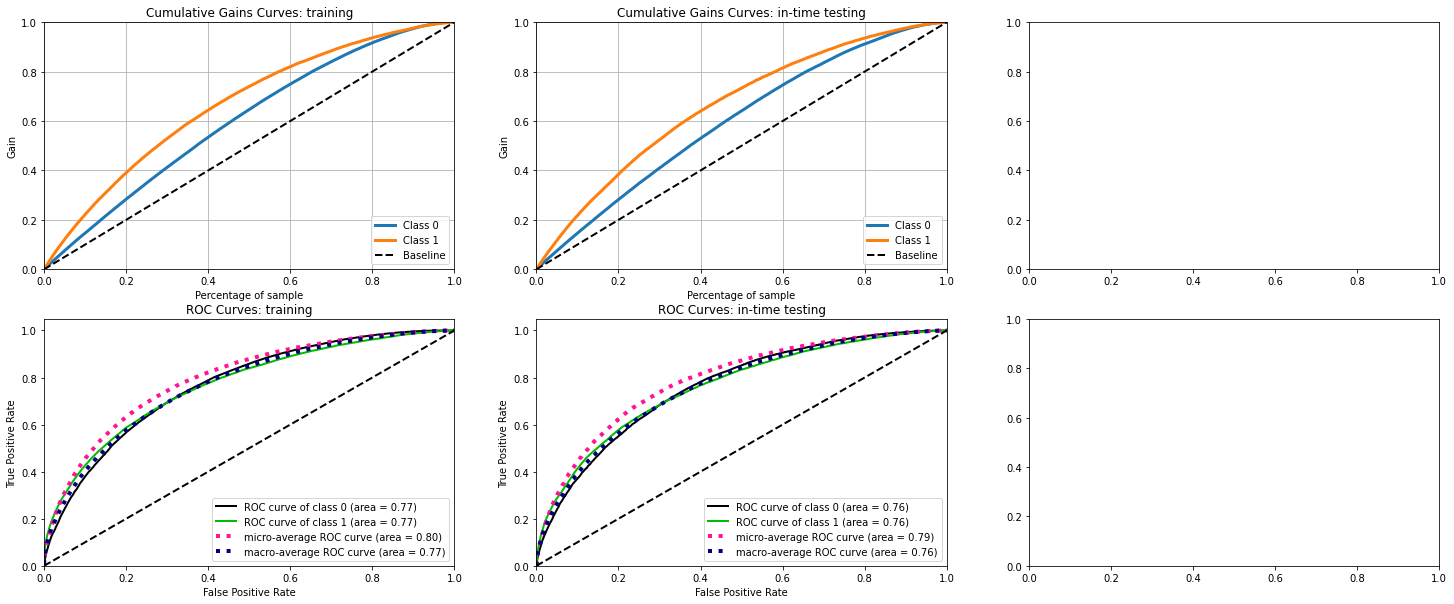

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
ax_f=axes.flatten()

_=skplt.metrics.plot_cumulative_gain(y_tr, y_tr_pred_lgbm, ax=ax_f[0], title='Cumulative Gains Curves: training')
_=skplt.metrics.plot_cumulative_gain(y_ts, y_ts_pred_lgbm, ax=ax_f[1], title='Cumulative Gains Curves: in-time testing')
_=skplt.metrics.plot_roc(y_tr, y_tr_pred_lgbm, ax=ax_f[3], title='ROC Curves: training')
_=skplt.metrics.plot_roc(y_ts, y_ts_pred_lgbm, ax=ax_f[4], title='ROC Curves: in-time testing')

In [104]:
df_model_pred = df_model.filter(F.col('member_no')!='None')
df_col_pred = df_model_pred.select(col_pred).toPandas()
df_member_no = df_model_pred.select('member_no').toPandas()
df_col_pred = df_col_pred.fillna(0)

In [105]:
pred = pd.concat([df_member_no,pd.DataFrame(pipeline_ev_lgbm.predict_proba(df_col_pred)[:, 1])],axis=1)

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [106]:
pred_1 = spark.createDataFrame(pred).withColumnRenamed('0','score')
pred_2 = pred_1.select('member_no','score', F.ntile(100).over(Window.partitionBy().orderBy(F.asc('score'))).alias('percentile'))
df_model_2 = df_model_pred.join(pred_2, on='member_no',how='left')
pd_model_2 = df_model_2.filter(F.col('percentile')>=80).fillna(0).toPandas()

In [107]:
class onehot_df(TransformerMixin, BaseEstimator):
    def __init__(self, col_to_code, handle_unknown='ignore'):
        self.col_to_code = col_to_code
        self.handle_unknown=handle_unknown
        
    def fit(self, X, y= None):
        # None in object columns may cause trouble
        self.enc = sk_OneHotEncoder(sparse=False, drop=None, handle_unknown=self.handle_unknown)
        self.enc.fit(X[self.col_to_code].fillna('missing').astype('category'))
        return self
    
    def transform(self, X, y= None):
        X_sparse=self.enc.transform(X[self.col_to_code].fillna('missing').astype('category'))
        X_oh=pd.DataFrame(X_sparse, columns=self.enc.get_feature_names(self.col_to_code)).reset_index(drop=True)
        # print(X_oh)
        X_dropped=X.drop(columns=self.col_to_code).reset_index(drop=True)
        X_res=pd.concat([X_dropped, X_oh], axis=1,  ignore_index=True)
        return X_res

In [108]:
pd_model_2= pd_model_2.fillna(0)
X_2, y_2=pd_model_2[col_pred], pd_model_2['ltv']
X_tr_2, X_ts_2, y_tr_2, y_ts_2 = train_test_split(X_2, y_2, test_size=0.25, random_state=42)

In [109]:
param_test ={'lgbm__num_leaves': [64, 68, 74, 80, 86, 92],
             'lgbm__max_depth': [5, 6, 7, 8],
             'lgbm__learning_rate': [0.001, 0.005, 0.01, 0.02, 0.05],
             'lgbm__min_child_samples': [18, 19, 20, 21, 22],
             'lgbm__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'lgbm__n_estimators': [100,300,500,1000],
             'lgbm__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
             'lgbm__subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
             'lgbm__subsample_freq': [4, 6, 8, 10, 12, 14],
             'lgbm__reg_alpha': [0, 0.1, 0.5, 0.8, 1, 1.2, 1.5, 1.8],
             'lgbm__reg_lambda': [0, 0.1, 0.5, 0.8, 1, 1.2, 1.5, 1.8]}

In [110]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score

pipeline_ev_lgbm_2 = sk_pipeline([('onehot', onehot_df(col_to_code=col_to_code)),
                              ('scaling', sk_StandardScaler()),
                              ('lgbm', lgb.LGBMRegressor())])

CV = RandomizedSearchCV(pipeline_ev_lgbm_2, param_test, scoring = 'r2', n_jobs= 1)
CV.fit(X_tr_2, y_tr_2)   

print('Best score and parameter combination = ')

print(CV.best_score_)    
print(CV.best_params_)

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



RandomizedSearchCV(estimator=Pipeline(steps=[('onehot',
                                              onehot_df(col_to_code=['holiday_flag',
                                                                     'is_member',
                                                                     'is_shopper',
                                                                     'is_consumer',
                                                                     'gender',
                                                                     'is_gwp',
                                                                     'age_cohorts',
                                                                     'marital_status',
                                                                     'city_grade',
                                                                     'educational_status',
                                                                     'user_job',
                          

Best score and parameter combination = 
0.4127228548322913
{'lgbm__subsample_freq': 6, 'lgbm__subsample': 0.9, 'lgbm__reg_lambda': 1.8, 'lgbm__reg_alpha': 0, 'lgbm__num_leaves': 68, 'lgbm__n_estimators': 1000, 'lgbm__min_child_weight': 0.01, 'lgbm__min_child_samples': 20, 'lgbm__max_depth': 6, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.5}


In [111]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
pipeline_ev_lgbm_2 = sk_pipeline([('onehot', onehot_df(col_to_code=col_to_code)),
                              ('scaling', sk_StandardScaler()),
                              ('lgbm', lgb.LGBMRegressor(**CV.best_params_))])
pipeline_ev_lgbm_2.fit(X_tr_2, y_tr_2)

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Pipeline(steps=[('onehot',
                 onehot_df(col_to_code=['holiday_flag', 'is_member',
                                        'is_shopper', 'is_consumer', 'gender',
                                        'is_gwp', 'age_cohorts',
                                        'marital_status', 'city_grade',
                                        'educational_status', 'user_job',
                                        'monthly_pay', 'is_inside_staff',
                                        'chinese_zodiac', 'constellation',
                                        'prom_ind', 'most_freq_holiday'])),
                ('scaling', StandardScaler()),
                ('lgbm',
                 LGBMRegressor(lgbm__colsample_bytree=0.5,
                               lgbm__learning_rate=0.05, lgbm__max_depth=6,
                               lgbm__min_child_samples=20,
                               lgbm__min_child_weight=0.01,
                               lgbm__n_estimators=1000, lgbm__n

In [112]:
y_tr_pred_lgbm_2=pipeline_ev_lgbm_2.predict(X_tr_2)
y_ts_pred_lgbm_2=pipeline_ev_lgbm_2.predict(X_ts_2)
y_tr_pred_lgbm_2
y_ts_pred_lgbm_2

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



array([ 616.302  ,  554.40535, 1005.52972, ...,  619.8898 ,  628.50282,
       1482.11639])

array([2380.0962 ,  699.31454,  628.76522, ..., 1316.65117,  943.5028 ,
        608.87235])

In [113]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_tr_2, y_tr_pred_lgbm_2)
mse = metrics.mean_squared_error(y_tr_2, y_tr_pred_lgbm_2)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_tr_2,y_tr_pred_lgbm_2)
X = X_tr_2.values.reshape(-1, 1)
y = y_tr_2.values.reshape(-1, 1)
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
def mean_absolute_percentage_error(y_tr_2, y_tr_pred_lgbm_2): 
    y_tr_2, y_tr_pred_lgbm_2 = np.array(y_tr_2), np.array(y_tr_pred_lgbm_2)
    return np.mean(sum(np.abs((y_tr_2 - y_tr_pred_lgbm_2))) / sum(y_tr_2)) * 100
mape = mean_absolute_percentage_error(y_tr_2, y_tr_pred_lgbm_2)

print('Results of sklearn.metrics:')
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
print("Adjusted R-Squared:", adjusted_r_squared)
print("MAPE:", mape)

Results of sklearn.metrics:
MAE: 938.6650681500746
MSE: 5176845.658601332
RMSE: 2275.268260799445
R-Squared: 0.6440811023917346
Adjusted R-Squared: 0.6440766611222202
MAPE: 83.06822569300319


In [114]:
mae = metrics.mean_absolute_error(y_ts_2, y_ts_pred_lgbm_2)
mse = metrics.mean_squared_error(y_ts_2, y_ts_pred_lgbm_2)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y_ts_2,y_ts_pred_lgbm_2)
X = X_ts_2.values.reshape(-1, 1)
y = y_ts_2.values.reshape(-1, 1)
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
def mean_absolute_percentage_error(y_ts_2, y_ts_pred_lgbm_2): 
    y_ts_2, y_ts_pred_lgbm_2 = np.array(y_ts_2), np.array(y_ts_pred_lgbm_2)
    return np.mean(sum(np.abs((y_ts_2 - y_ts_pred_lgbm_2))) / sum(y_ts_2)) * 100
mape = mean_absolute_percentage_error(y_ts_2, y_ts_pred_lgbm_2)

print('Results of sklearn.metrics:')
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
print("Adjusted R-Squared:", adjusted_r_squared)
print("MAPE:", mape)

Results of sklearn.metrics:
MAE: 978.8970196636989
MSE: 3859933.755240249
RMSE: 1964.6714115190482
R-Squared: 0.2538514313119955
Adjusted R-Squared: 0.2538234982269144
MAPE: 89.33965746242224


In [115]:
df_oot_pred = df_oot.filter(F.col('member_no')!='None')
df_oot_col_pred = df_oot_pred.select(col_pred).toPandas()
df_oot_member_no = df_oot_pred.select('member_no').toPandas()
df_oot_col_pred = df_oot_col_pred.fillna(0)

In [116]:
pred_oot = pd.concat([df_oot_member_no,pd.DataFrame(pipeline_ev_lgbm.predict_proba(df_oot_col_pred)[:, 1])],axis=1)
pred_oot_1 = spark.createDataFrame(pred_oot).withColumnRenamed('0','probability')
score_file = pred_oot_1.select('member_no','probability', F.ntile(100).over(Window.partitionBy().orderBy(F.asc('probability'))).alias('percentile'))
score_file_binary = score_file.join(df_oot_pred, on = 'member_no', how='inner').drop('ltv','purch_ind','outcome_event_ind')

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [117]:
pred_oot_1 = spark.createDataFrame(pred_oot).withColumnRenamed('0','probability')

In [118]:
score_file = pred_oot_1.select('member_no','probability', F.ntile(100).over(Window.partitionBy().orderBy(F.asc('probability'))).alias('percentile'))
score_file_binary = score_file.join(df_oot_pred, on = 'member_no', how='inner').drop('ltv','purch_ind','outcome_event_ind')

In [119]:
score_file_reg = score_file_binary.filter(F.col('percentile')>=80)
score_file_col_pred = score_file_reg.select(col_pred).toPandas()
score_file_member_no = score_file_reg.select('member_no').toPandas()
score_file_col_pred = score_file_col_pred.fillna(0)
df_reg = pd.concat([score_file_member_no,pd.DataFrame(pipeline_ev_lgbm_2.predict(score_file_col_pred))],axis=1).fillna(0)

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [120]:
df_regression = spark.createDataFrame(df_reg).withColumnRenamed('0','ltv')

In [121]:
#regression (check spearman correlation)
#cumulative gain curve and auc(without pca check model performance)
#apply some automl, parameter tuning 
#check score logic , (probability * ltv )
#new features
score_file_final = score_file_binary.join(df_regression, on='member_no',how='left').fillna(0,subset=['ltv'])\
                            .withColumnRenamed('percentile','probability_percentile')\
                            .withColumn('value', when(F.col('probability_percentile')>=80, F.col('ltv')).otherwise(F.lit(0)))\
                            .withColumn('expected_value', F.col('probability')*F.abs(F.col('value')))\
                            .drop('ltv')

In [122]:
score_file_final.write.mode('overwrite').saveAsTable('default.lego_customer_score_file')

In [123]:
max_min_scaler = lambda x : (x-np.min(x))/(np.max(x)-np.min(x))
df_score_file_final = score_file_final.select('member_no','expected_value').toPandas()
df_score_file_final['score_new'] = df_score_file_final[['expected_value']].apply(max_min_scaler)

In [124]:
lego_customer_score_file = spark.createDataFrame(df_score_file_final).withColumn('score',F.round(F.col('score_new')*100,0)).drop('score_new')

In [125]:
lego_customer_score_file.select('member_no','score')\
            .write\
            .mode('overwrite').format('csv').save('hdfs://172.20.37.126:8020/user/hive/warehouse/default.db/lego_customer_score_file')

In [126]:
result_lgbm_tr = permutation_importance(pipeline_ev_lgbm_2, X_tr_2, y_tr_2, n_repeats=var_impr_repeat, random_state=0, n_jobs=-1)
sorted_idx_lgbm_tr = result_lgbm_tr.importances_mean.argsort()

result_lgbm_ts = permutation_importance(pipeline_ev_lgbm_2, X_ts_2, y_ts_2, n_repeats=var_impr_repeat, random_state=0, n_jobs=-1)
sorted_idx_lgbm_ts = result_lgbm_ts.importances_mean.argsort()

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 36218)
Traceback (most recent call last):
  File "/emr/notebook-env/lib/python3.7/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/emr/notebook-env/lib/python3.7/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/emr/notebook-env/lib/python3.7/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/emr/notebook-env/lib/python3.7/socketserver.py", line 720, in __init__
    self.handle()
  File "/usr/lib/spark/python/pyspark/accumulators.py", line 262, in h

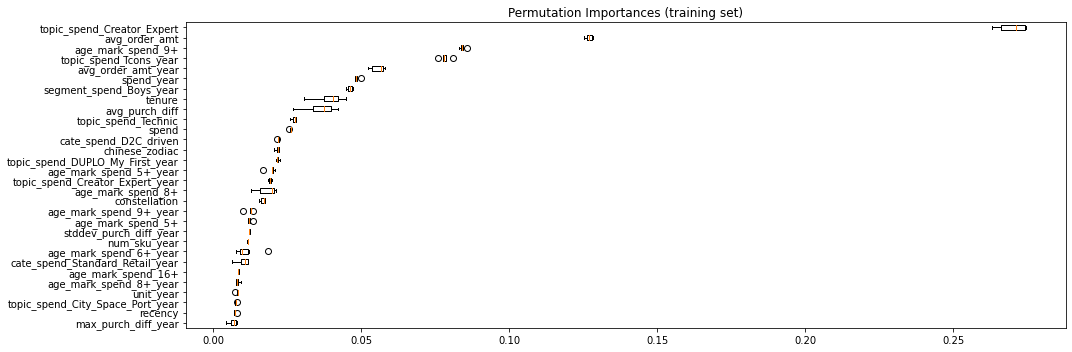

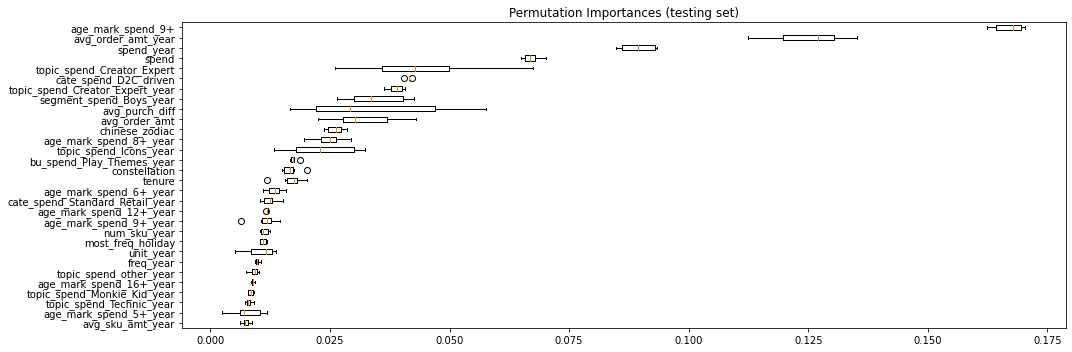

In [127]:
# fig, ax = plt.subplots(figsize=(20,5))
fig, ax = plt.subplots(figsize=(15,5))
_=ax.boxplot(result_lgbm_tr.importances[sorted_idx_lgbm_tr[(-num_var_to_show):]].T,
           vert=False, labels=X_tr_2.columns[sorted_idx_lgbm_tr[(-num_var_to_show):]])
_=ax.set_title("Permutation Importances (training set)")
fig.tight_layout()
# plt.show()

fig, ax = plt.subplots(figsize=(15,5))
_=ax.boxplot(result_lgbm_ts.importances[sorted_idx_lgbm_ts[(-num_var_to_show):]].T,
           vert=False, labels=X_ts_2.columns[sorted_idx_lgbm_ts[(-num_var_to_show):]])
_=ax.set_title("Permutation Importances (testing set)")
fig.tight_layout()
# plt.show()

In [128]:
# result_lgbm_tr = permutation_importance(pipeline_ev_lgbm_2, X_tr_2, y_tr_2, n_repeats=2, random_state=0, n_jobs=-1)
# sorted_idx_lgbm_tr = result_lgbm_tr.importances_mean.argsort()

# result_lgbm_ts = permutation_importance(pipeline_ev_lgbm_2, X_ts_2, y_ts_2, n_repeats=2, random_state=0, n_jobs=-1)
# sorted_idx_lgbm_ts = result_lgbm_ts.importances_mean.argsort()

In [129]:
# # fig, ax = plt.subplots(figsize=(20,5))
# fig, ax = plt.subplots(figsize=(15,5))
# _=ax.boxplot(result_lgbm_tr.importances[sorted_idx_lgbm_tr[(-num_var_to_show):]].T,
#            vert=False, labels=X_tr.columns[sorted_idx_lgbm_tr[(-num_var_to_show):]])
# _=ax.set_title("Permutation Importances (training set)")
# fig.tight_layout()
# # plt.show()

# fig, ax = plt.subplots(figsize=(15,5))
# _=ax.boxplot(result_lgbm_ts.importances[sorted_idx_lgbm_ts[(-num_var_to_show):]].T,
#            vert=False, labels=X_ts.columns[sorted_idx_lgbm_ts[(-num_var_to_show):]])
# _=ax.set_title("Permutation Importances (testing set)")
# fig.tight_layout()
# # plt.show()

In [27]:
spark.stop()